# Importing Packages

First, we import some Python packages that will help us analyze the data, especially `pandas` for data analysis and `matplotlib` for visualization

In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns

import warnings
from collections import Counter
import datetime
import wordcloud
import json

In [3]:
# Hiding warnings for cleaner display
warnings.filterwarnings('ignore')

# Configuring some options
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
# If you want interactive plots, uncomment the next line
# %matplotlib notebook

In [4]:
#Basic configurations for improving visualization of graphs

PLOT_COLORS = ["#268bd2", "#0052CC", "#FF5722", "#b58900", "#003f5c"]
pd.options.display.float_format = '{:.2f}'.format
sns.set(style="ticks")
plt.rc('figure', figsize=(8, 5), dpi=100)
plt.rc('axes', labelpad=20, facecolor="#ffffff", linewidth=0.4, grid=True, labelsize=14)
plt.rc('patch', linewidth=0)
plt.rc('xtick.major', width=0.2)
plt.rc('ytick.major', width=0.2)
plt.rc('grid', color='#9E9E9E', linewidth=0.4)
plt.rc('font', family='Arial', weight='400', size=10)
plt.rc('text', color='#282828')
plt.rc('savefig', pad_inches=0.3, dpi=300)

# Reading the dataset

In [7]:
df = pd.read_csv('dataset/IN_youtube_trending_data.csv')

### Let's get a feel of what our dataset looks like by displaying its first few rows

In [8]:
df.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,Iot0eF6EoNA,Sadak 2 | Official Trailer | Sanjay | Pooja | ...,2020-08-12T04:31:41Z,UCGqvJPRcv7aVFun-eTsatcA,FoxStarHindi,24,2020-08-12T00:00:00Z,sadak|sadak 2|mahesh bhatt|vishesh films|pooja...,9885899,224925,3979409,350210,https://i.ytimg.com/vi/Iot0eF6EoNA/default.jpg,False,False,Three Streams. Three Stories. One Journey. Sta...
1,x-KbnJ9fvJc,Kya Baat Aa : Karan Aujla (Official Video) Tan...,2020-08-11T09:00:11Z,UCm9SZAl03Rev9sFwloCdz1g,Rehaan Records,10,2020-08-12T00:00:00Z,[None],11308046,655450,33242,405146,https://i.ytimg.com/vi/x-KbnJ9fvJc/default.jpg,False,False,Singer/Lyrics: Karan Aujla Feat Tania Music/ D...
2,KX06ksuS6Xo,Diljit Dosanjh: CLASH (Official) Music Video |...,2020-08-11T07:30:02Z,UCZRdNleCgW-BGUJf-bbjzQg,Diljit Dosanjh,10,2020-08-12T00:00:00Z,clash diljit dosanjh|diljit dosanjh|diljit dos...,9140911,296533,6179,30058,https://i.ytimg.com/vi/KX06ksuS6Xo/default.jpg,False,False,CLASH official music video performed by DILJIT...
3,UsMRgnTcchY,Dil Ko Maine Di Kasam Video | Amaal M Ft.Ariji...,2020-08-10T05:30:49Z,UCq-Fj5jknLsUf-MWSy4_brA,T-Series,10,2020-08-12T00:00:00Z,hindi songs|2020 hindi songs|2020 new songs|t-...,23564512,743931,84162,136942,https://i.ytimg.com/vi/UsMRgnTcchY/default.jpg,False,False,Gulshan Kumar and T-Series presents Bhushan Ku...
4,WNSEXJJhKTU,"Baarish (Official Video) Payal Dev,Stebin Ben ...",2020-08-11T05:30:13Z,UCye6Oz0mg46S362LwARGVcA,VYRLOriginals,10,2020-08-12T00:00:00Z,VYRL Original|Mohsin Khan|Shivangi Joshi|Payal...,6783649,268817,8798,22984,https://i.ytimg.com/vi/WNSEXJJhKTU/default.jpg,False,False,VYRL Originals brings to you ‘Baarish’ - the b...


Now, let's see some information about our dataset using the info() method.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181286 entries, 0 to 181285
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   video_id           181286 non-null  object
 1   title              181286 non-null  object
 2   publishedAt        181286 non-null  object
 3   channelId          181286 non-null  object
 4   channelTitle       181285 non-null  object
 5   categoryId         181286 non-null  int64 
 6   trending_date      181286 non-null  object
 7   tags               181286 non-null  object
 8   view_count         181286 non-null  int64 
 9   likes              181286 non-null  int64 
 10  dislikes           181286 non-null  int64 
 11  comment_count      181286 non-null  int64 
 12  thumbnail_link     181286 non-null  object
 13  comments_disabled  181286 non-null  bool  
 14  ratings_disabled   181286 non-null  bool  
 15  description        164009 non-null  object
dtypes: bool(2), int64(5)

We can see that there are 37,352 entries in the dataset. We can see also that all columns in the dataset are complete (i.e. they have 37,352 non-null entries) except for description column which has some null values; it only has 36,791 non-null values.

# Data Cleaning

The description column has some rows containing null values represented by NaN. Let's have a look at them.

In [10]:
df[df["description"].apply(lambda x: pd.isna(x))].head(3)

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
74,fC3G-P3QINo,DISAPPOINTED | NEED YOUR SUPPORT |,2020-08-11T09:34:58Z,UC2kBDwkqiy7zgH1-M4UtUXQ,Dipika Ki Duniya,22,2020-08-12T00:00:00Z,[None],794840,53933,901,2477,https://i.ytimg.com/vi/fC3G-P3QINo/default.jpg,False,False,NaN
211,DY7auMfX1YU,LIVE: Janmastami - Dwarka: Vhalo Maro Aaavshe ...,2020-08-12T19:30:27Z,UCneBFse451PgKgXJTDqikYA,Doordarshan Girnar,1,2020-08-13T00:00:00Z,DD Girnar|DD|Gujarati|giranar|news,59327,1151,53,28,https://i.ytimg.com/vi/DY7auMfX1YU/default.jpg,False,False,NaN
308,fC3G-P3QINo,DISAPPOINTED | NEED YOUR SUPPORT |,2020-08-11T09:34:58Z,UC2kBDwkqiy7zgH1-M4UtUXQ,Dipika Ki Duniya,22,2020-08-13T00:00:00Z,[None],898632,57324,1030,2612,https://i.ytimg.com/vi/fC3G-P3QINo/default.jpg,False,False,NaN


So to do some sort of data cleaning, and to get rid of those null values, we put an empty string in place of each null value in the description column.

In [11]:
df["description"] = df["description"].fillna(value="")

# Dataset Collection Year

Let's see in which years the data was collected

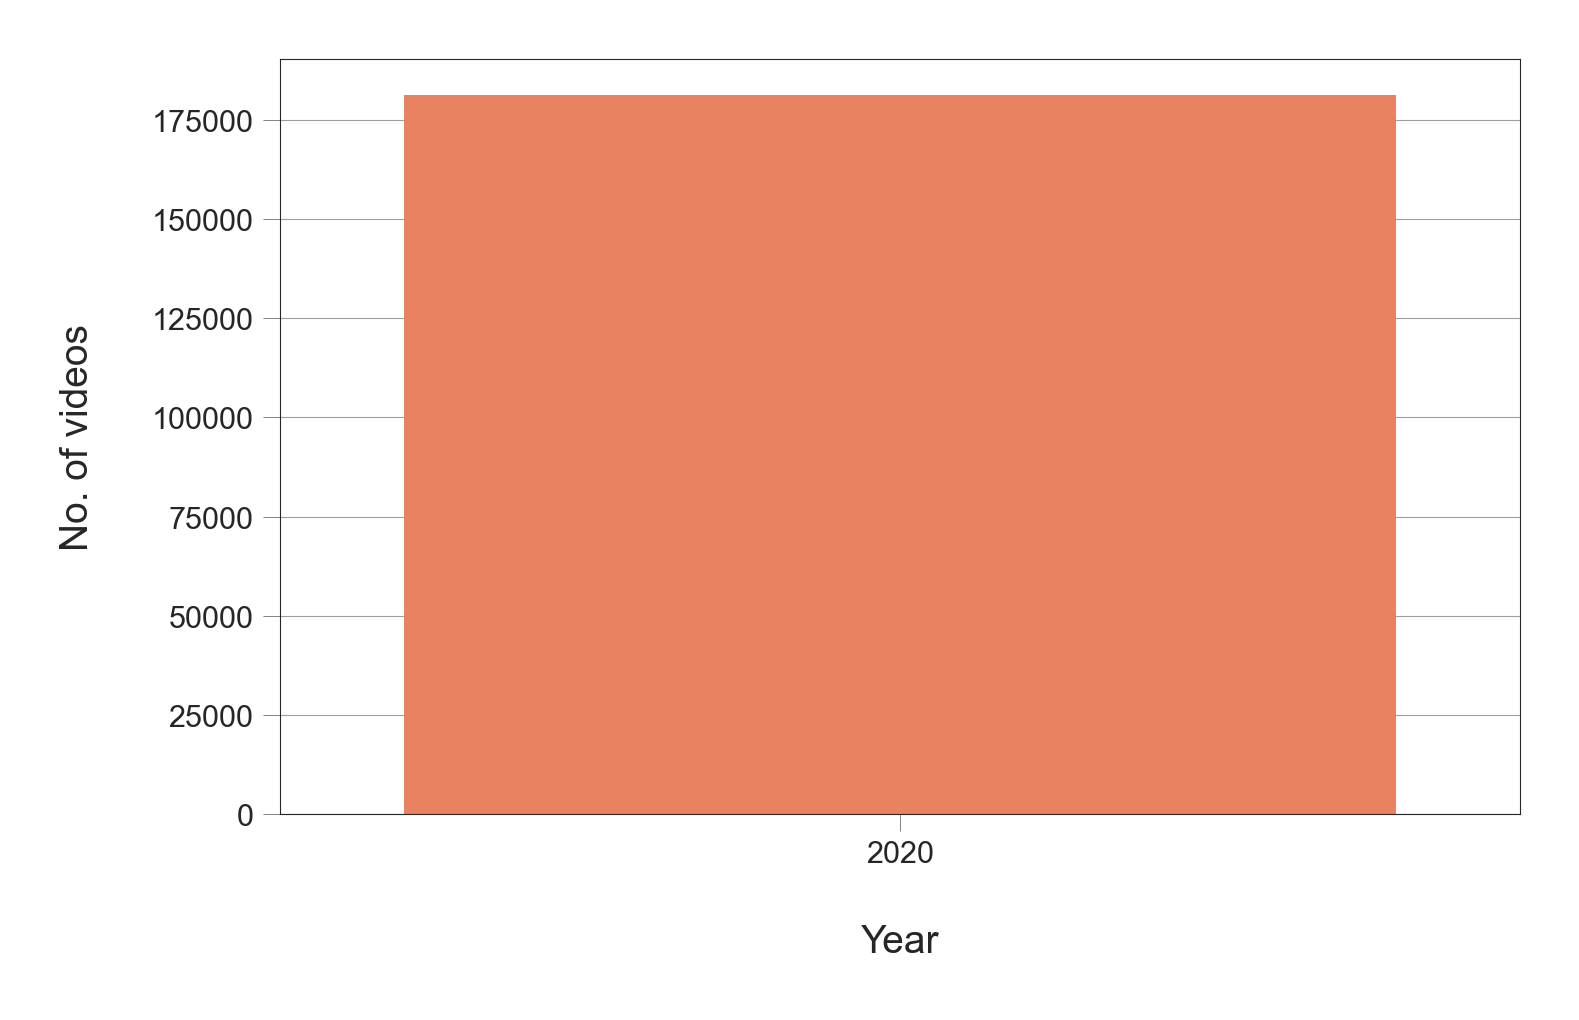

In [12]:
cdf = df["trending_date"].apply(lambda x: '20' + x[:2]).value_counts().to_frame().reset_index().rename(columns={"index": "year", "trending_date": "No_of_videos"})

fig, ax = plt.subplots()
_ = sns.barplot(x="year", y="No_of_videos", data=cdf, 
                palette=sns.color_palette(['#ff764a', '#ffa600'], n_colors=7), ax=ax)
_ = ax.set(xlabel="Year", ylabel="No. of videos")

In [13]:
df["trending_date"].apply(lambda x: '20' + x[:2]).value_counts(normalize=True)

2020   1.00
Name: trending_date, dtype: float64

We can see that the dataset was collected in 2017 and 2018 with around 76% of it in 2018 and 24% in 2017.

# Description of numerical columns

Now, let's see some statistical information about the numerical columns of our dataset

In [14]:
df.describe()

,categoryId,view_count,likes,dislikes,comment_count
count,181286.00,181286.00,181286.00,181286.00,181286.00
mean,20.87,3014343.85,157608.44,3234.07,9381.92
std,6.01,7253146.21,420697.90,84748.98,80657.87
min,1.00,0.00,0.00,0.00,0.00
25%,20.00,431504.25,15474.00,0.00,390.00
50%,24.00,1052961.50,45774.50,104.00,1267.00
75%,24.00,2677517.75,136098.50,1451.00,4437.00
max,29.00,264407389.00,16115240.00,12341474.00,6738565.00


We note from the table above that

* The average number of viewson a trending video is `1,060,477`. The median value for the number of views is `304,586` , which means that half the trending videos have views that are less than that number, and the other half have views larger than that number.
* The average number of likes on a trending video is `27,082` , while the average number of dislikes is `1,665`. 
* The average comment count is `2,677` while the median is `329`.

## Views Histogram


Let's plot a histogram for the views column to take a look at its distribution: to see how many videos have views between 10 million and 20 million, how many videos have between 20 million and 30 million, and so on

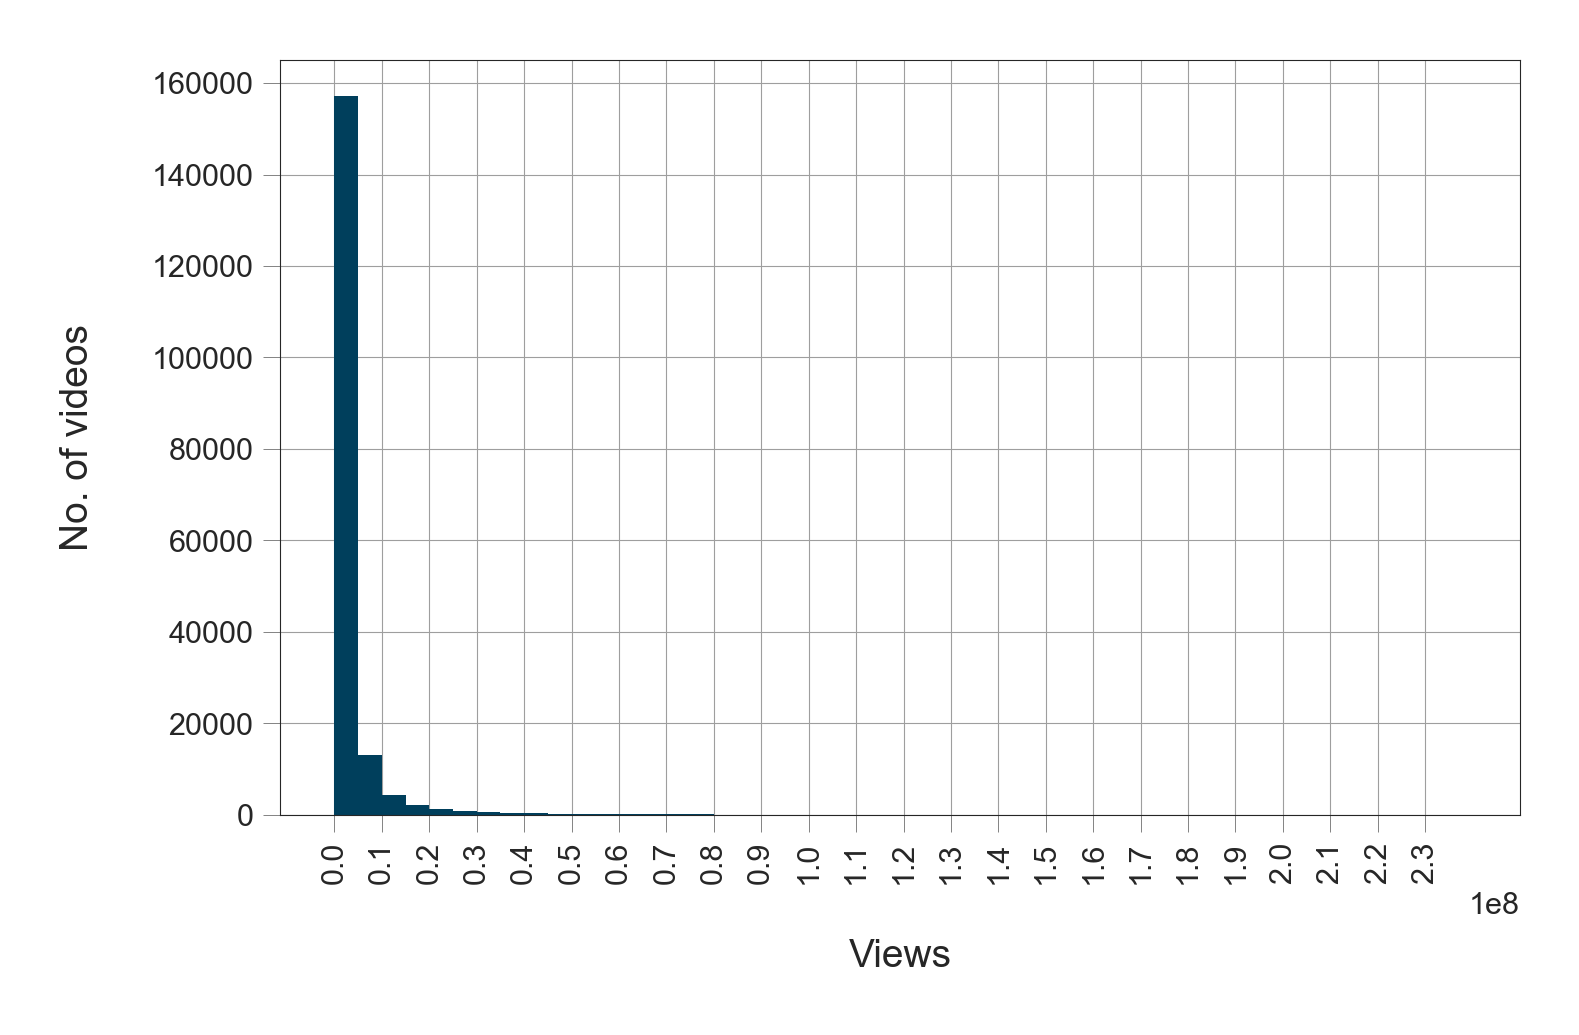

In [15]:
fig, ax = plt.subplots()
_ = sns.distplot(df["view_count"], kde=False, color=PLOT_COLORS[4], hist_kws={'alpha': 1}, bins=np.linspace(0, 2.3e8, 47), ax=ax)
_ = ax.set(xlabel="Views", ylabel="No. of videos", xticks=np.arange(0, 2.4e8, 1e7))
_ = ax.set_xlim(right=2.5e8)
_ = plt.xticks(rotation=90)

In [18]:
import mpld3
html_str = mpld3.fig_to_html(fig)
Html_file= open("index1.html","w")
Html_file.write(html_str)
Html_file.close()

Now let's plot the histogram just for videos with 25 million views or less to get a closer look at the distribution of the data.

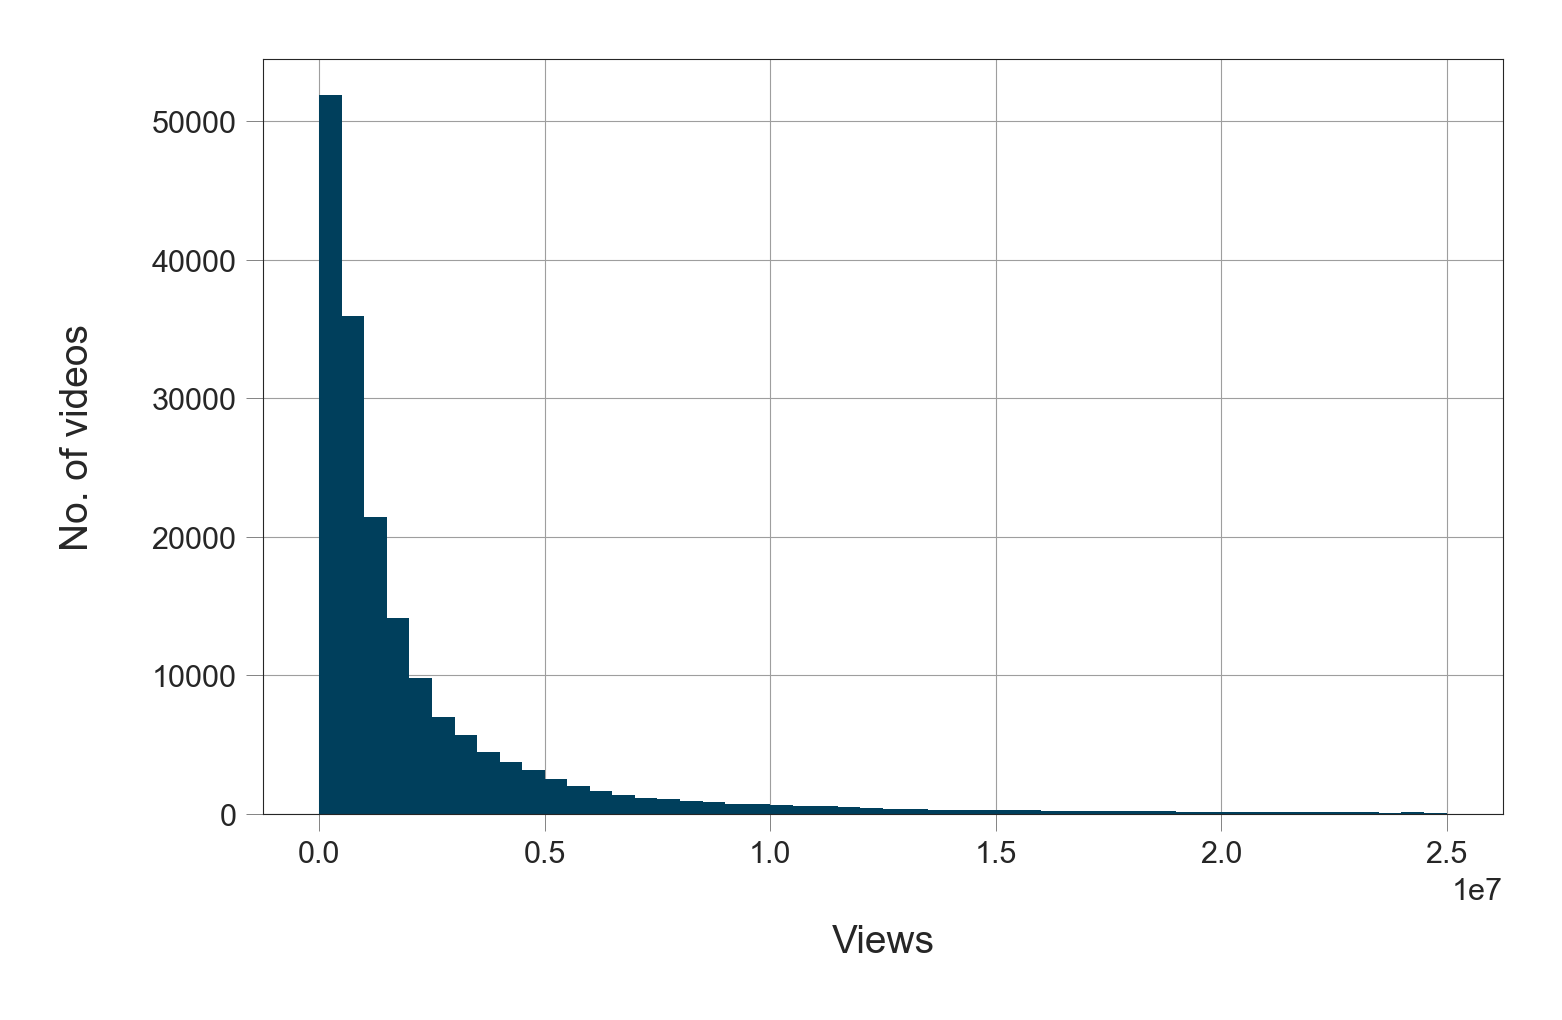

In [20]:
fig, ax = plt.subplots()
_ = sns.distplot(df[df["view_count"] < 25e6]["view_count"], kde=False, color=PLOT_COLORS[4], hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel="Views", ylabel="No. of videos")

In [21]:
import mpld3
html_str = mpld3.fig_to_html(fig)
Html_file= open("index2.html","w")
Html_file.write(html_str)
Html_file.close()

Now we see that the majority of trending videos have 1 million views or less.

 Let's see the exact percentage of videos less than 1 million views.

In [22]:
df[df['view_count'] < 1e6]['view_count'].count() / df['view_count'].count() * 100

48.449963041823416

In [23]:
df[df['view_count'] < 1.5e6]['view_count'].count() / df['view_count'].count() * 100

60.27547631918626

In [24]:
df[df['view_count'] < 5e6]['view_count'].count() / df['view_count'].count() * 100

86.74580497115055

So, it is around `80%`. Similarly, we can see that the percentage of videos with less than 1.5 million views is around `86%`, and that the percentage of videos with less than 5 million views is around `95%`.

## Likes Histogram

Let's plot histogram for likes, now.

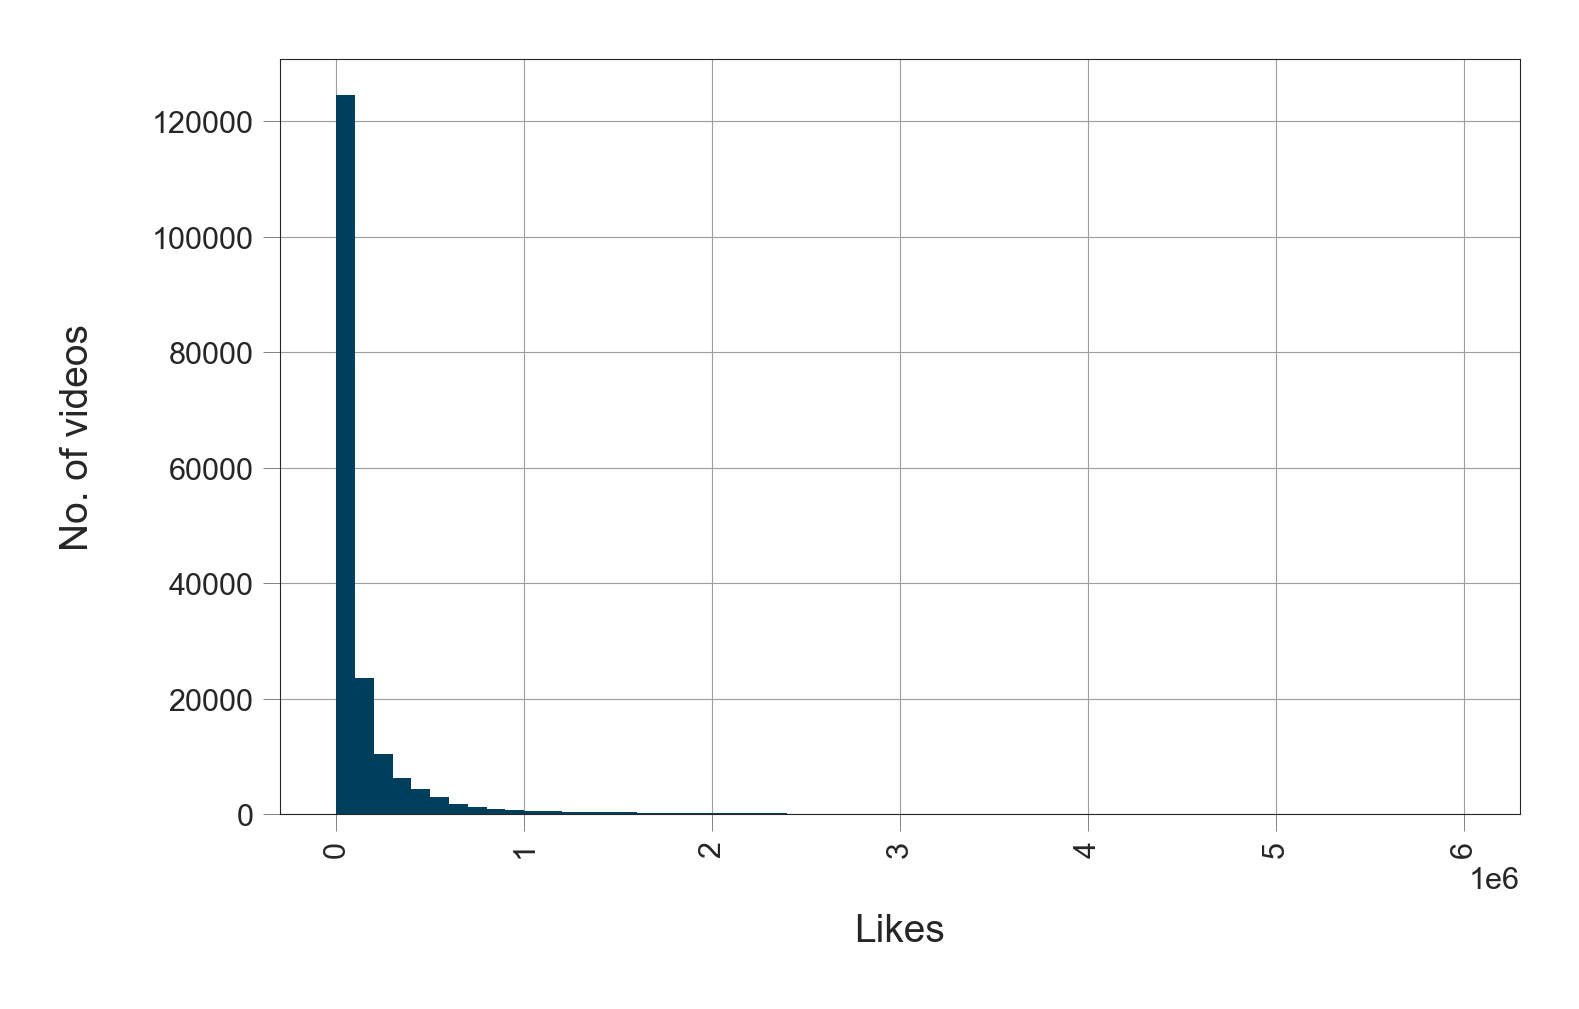

In [26]:
plt.rc('figure.subplot', wspace=0.9)
fig, ax = plt.subplots()
_ = sns.distplot(df["likes"], kde=False, 
                 color=PLOT_COLORS[4], hist_kws={'alpha': 1}, 
                 bins=np.linspace(0, 6e6, 61), ax=ax)
_ = ax.set(xlabel="Likes", ylabel="No. of videos")
_ = plt.xticks(rotation=90)

In [27]:
import mpld3
html_str = mpld3.fig_to_html(fig)
Html_file= open("index3.html","w")
Html_file.write(html_str)
Html_file.close()

We note that the vast majority of trending videos have between 0 and 100,000 likes. Let's plot the histogram just for videos with 1000,000 likes or less to get a closer look at the distribution of the data

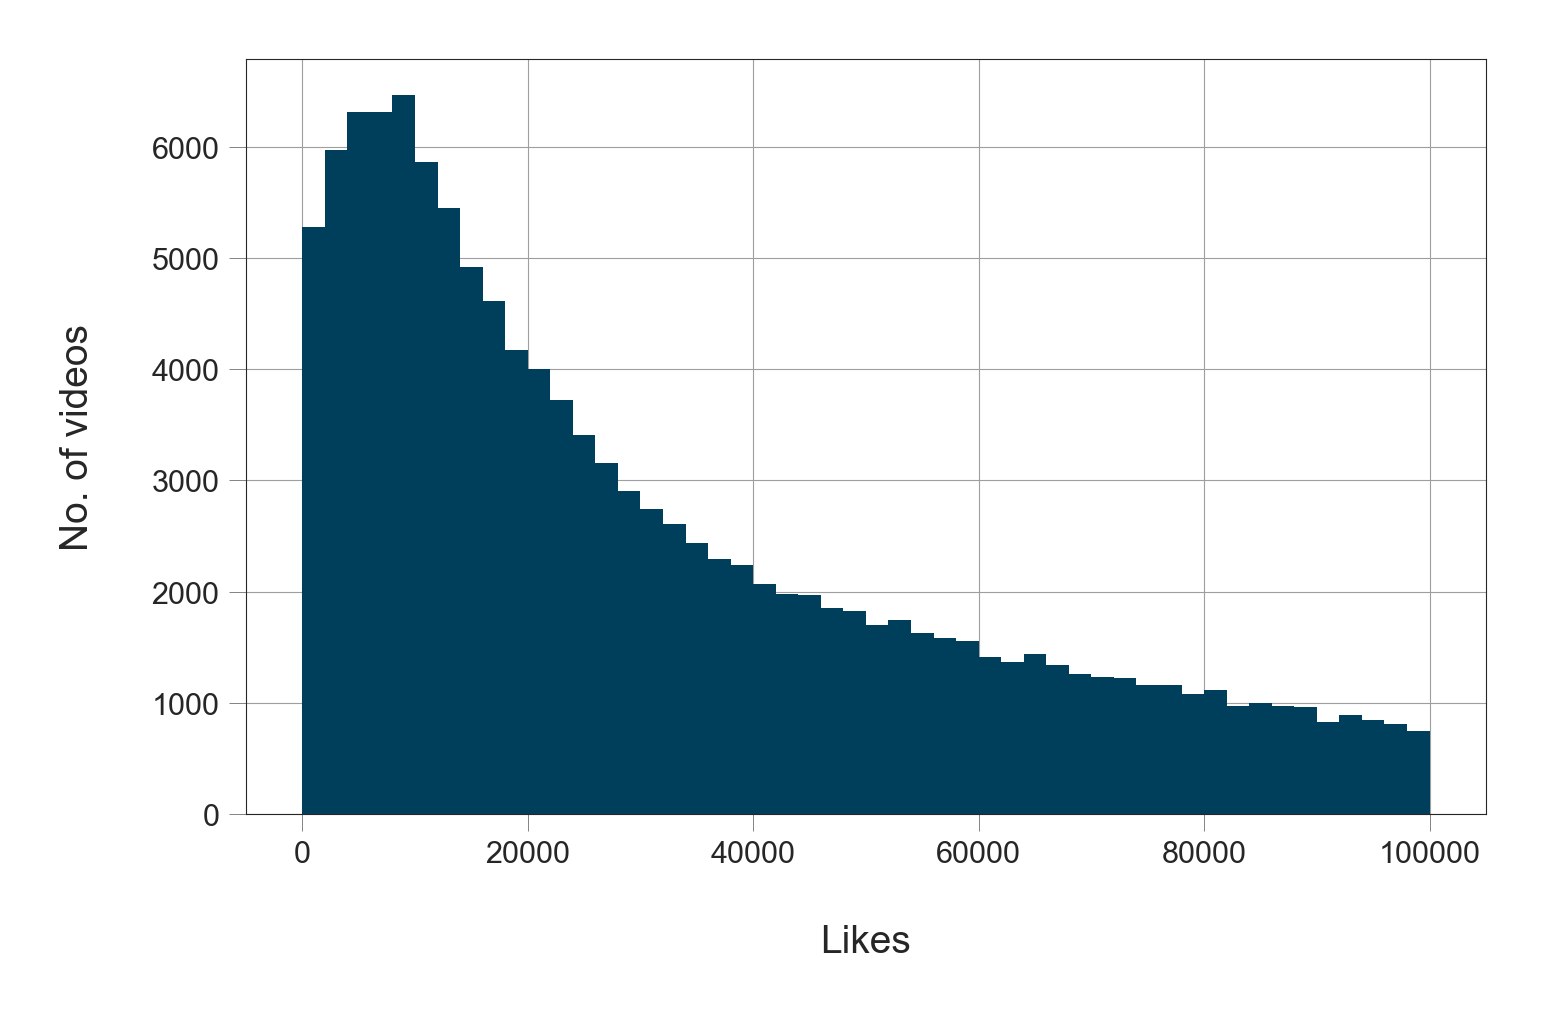

In [28]:
fig, ax = plt.subplots()
_ = sns.distplot(df[df["likes"] <= 1e5]["likes"], kde=False, 
                 color=PLOT_COLORS[4], hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel="Likes", ylabel="No. of videos")

In [29]:
import mpld3
html_str = mpld3.fig_to_html(fig)
Html_file= open("index4.html","w")
Html_file.write(html_str)
Html_file.close()

Now we can see that the majority of trending videos have 40000 likes or less with a peak for videos with 2000 likes or less.

Let's see the exact percentage of videos with less than 40000 likes

In [30]:
df[df['likes'] < 4e4]['likes'].count() / df['likes'].count() * 100

46.81387420981212

In [31]:
df[df['likes'] < 10e4]['likes'].count() / df['likes'].count() * 100

68.71021479871584

We see that the percentage of videos with less than 40,000 likes is around `87%`.
Similarly, we can see that the percentage of videos with less than 100,000 likes is around `94%`.

## Comment Count Histogram

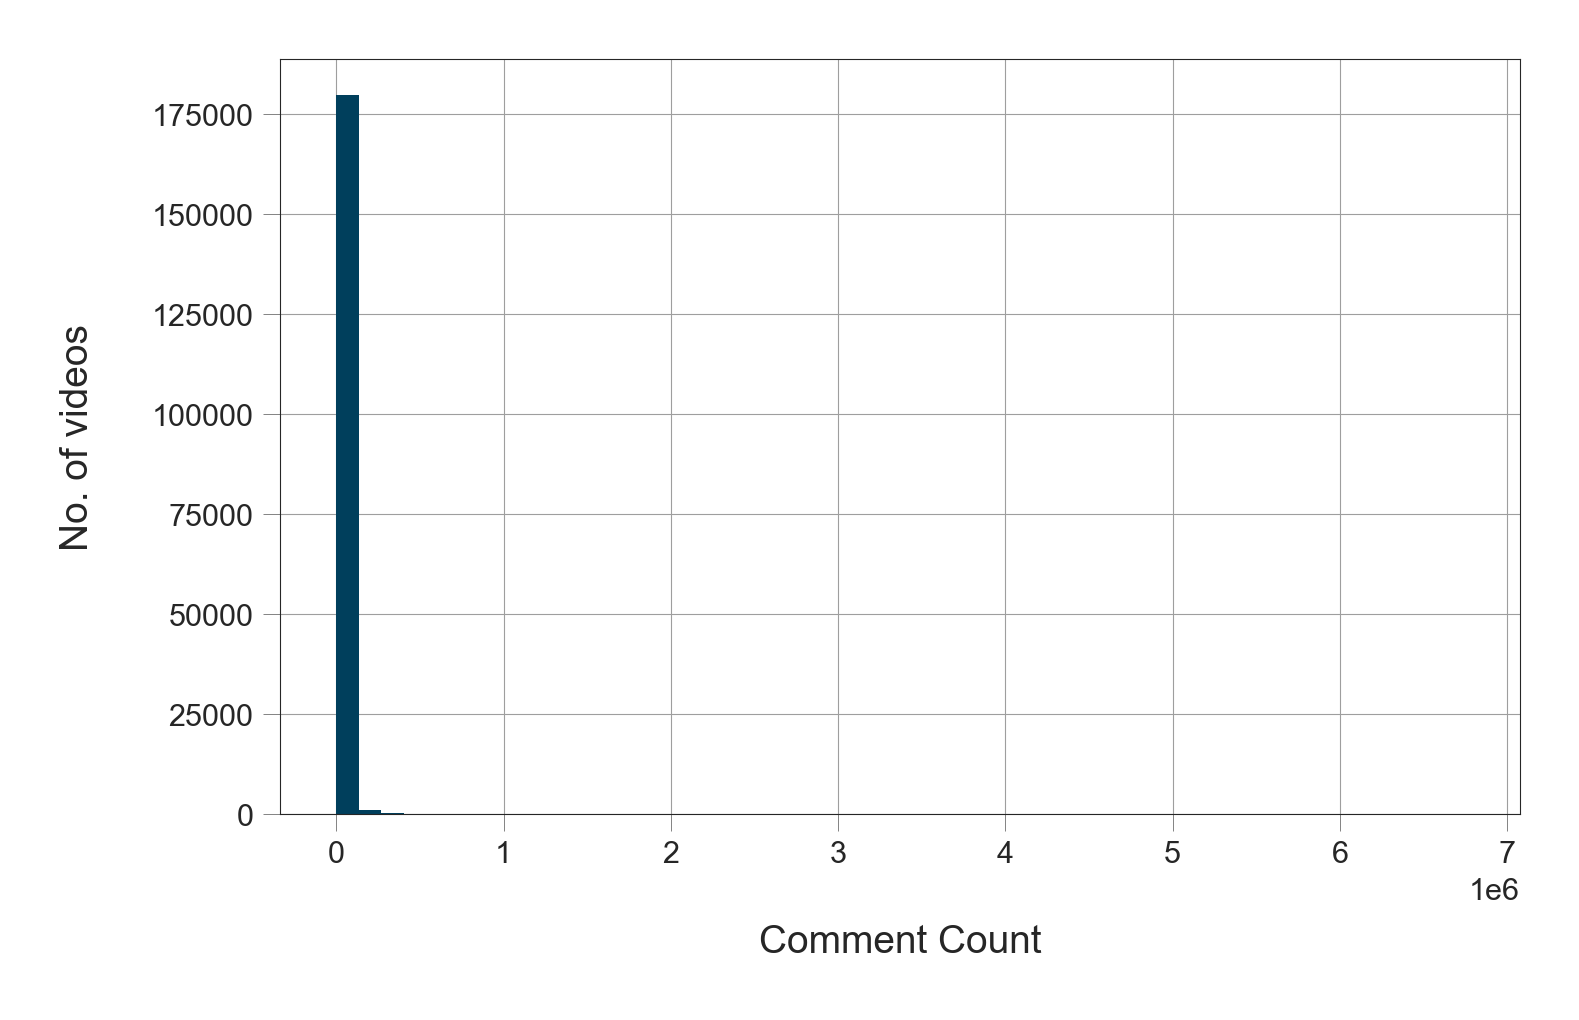

In [32]:
fig, ax = plt.subplots()
_ = sns.distplot(df["comment_count"], kde=False, rug=False, 
                 color=PLOT_COLORS[4], hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel="Comment Count", ylabel="No. of videos")

In [33]:
import mpld3
html_str = mpld3.fig_to_html(fig)
Html_file= open("index5.html","w")
Html_file.write(html_str)
Html_file.close()

Let's get a closer look by eliminating entries with comment count larger than `200000`.

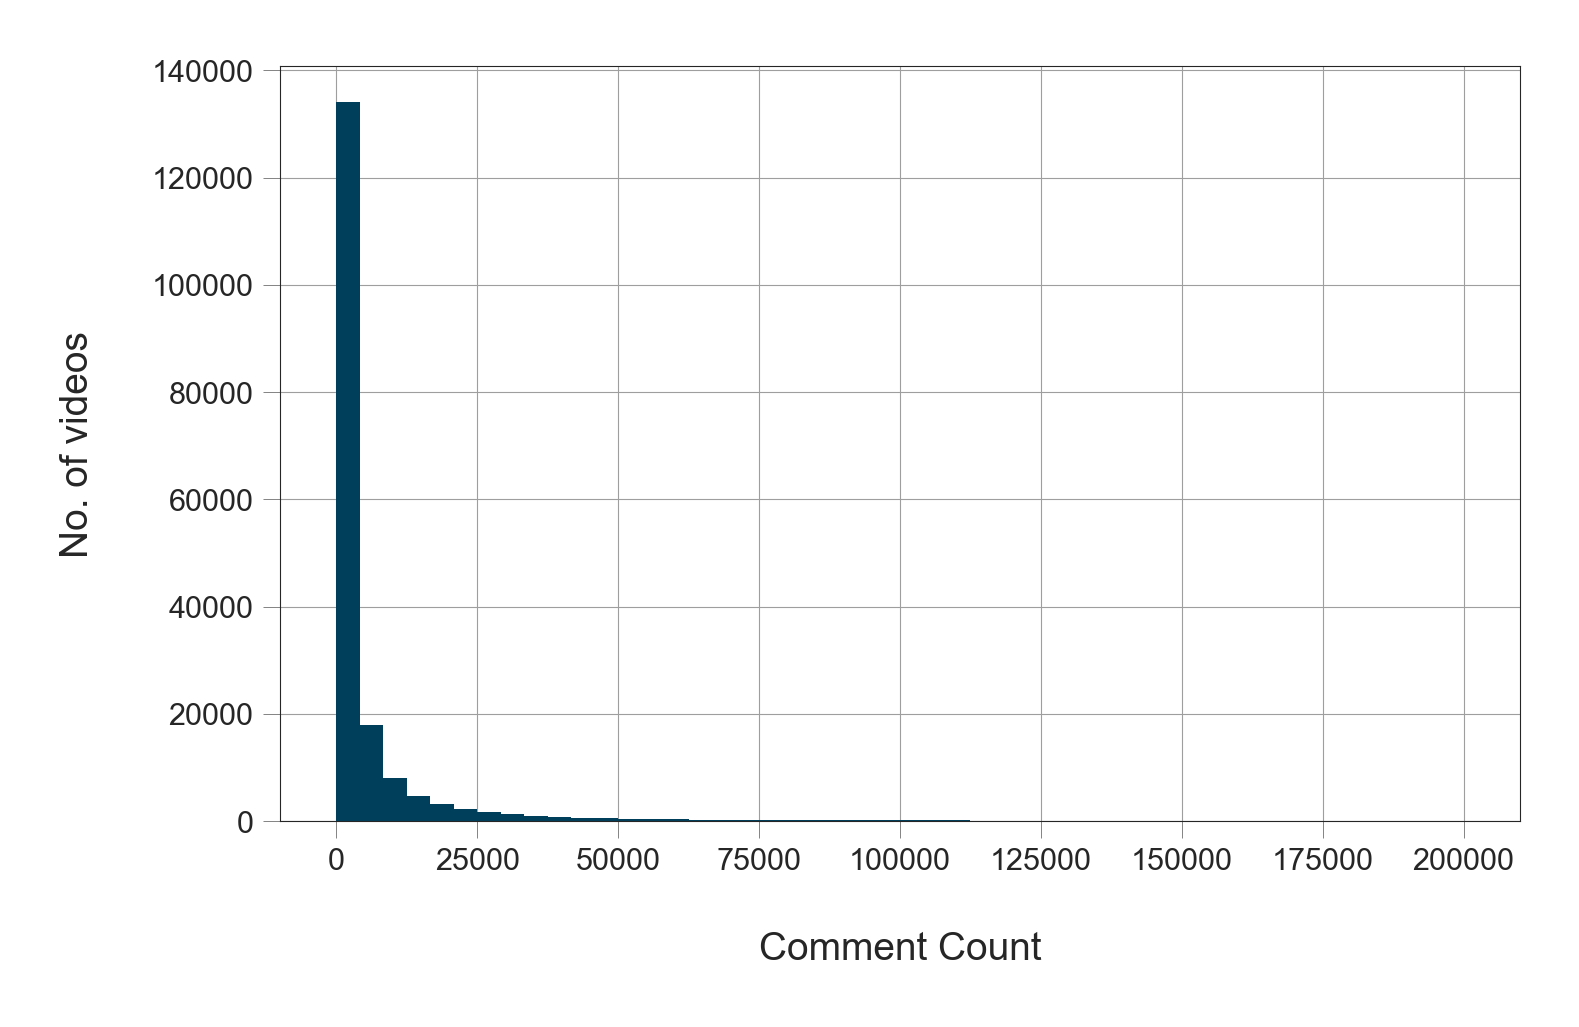

In [34]:
fig, ax = plt.subplots()
_ = sns.distplot(df[df["comment_count"] < 200000]["comment_count"], kde=False, rug=False, 
                 color=PLOT_COLORS[4], hist_kws={'alpha': 1}, 
                 bins=np.linspace(0, 2e5, 49), ax=ax)
_ = ax.set(xlabel="Comment Count", ylabel="No. of videos")

In [35]:
import mpld3
html_str = mpld3.fig_to_html(fig)
Html_file= open("index6.html","w")
Html_file.write(html_str)
Html_file.close()

We see that most trending videos have around

$$\frac{25000}{7}≈3571 \ comments $$
 
since each division in the graph has seven histogram bins.

As with views and likes, let's see the exact percentage of videos with less than 3500 comments

In [36]:
df[df['comment_count'] < 3500]['comment_count'].count() / df['comment_count'].count() * 100

70.9552861224805

In [37]:
df[df['comment_count'] < 25000]['comment_count'].count() / df['comment_count'].count() * 100

93.8417748750593

Thus, we see that percentage of videos with comment count less than 3500 is around `88%` whereas less than 25000 is `97%`.

# Description of non-numerical columns

After we are done with numerical columns of our dataset, let's move to non-numerical columns of the dataset.

In [38]:
df.describe(include = ['O'])

,video_id,title,publishedAt,channelId,channelTitle,trending_date,tags,thumbnail_link,description
count,181286,181286,181286,181286,181285,181286,181286,181286,181286
unique,55389,56104,54873,4106,4283,929,34927,55390,47048
top,y_RHQ4mBDKA,#shorts #strugglejeet,2021-06-04T18:15:01Z,UCvrhwpnp2DHYQ1CbXby9ypQ,Vijay Television,2021-03-02T00:00:00Z,[None],https://i.ytimg.com/vi/y_RHQ4mBDKA/default.jpg,
freq,19,41,20,2221,2221,398,34799,19,17277


From the table above, we can see that there are `205` unique dates, which means that our dataset contains collected data about trending videos over `205` days.

From video_id description, we can see that there are `37352` videos (which is expected because our dataset contains `37352` entries), but we can see also that there are only `16307` unique videos which means that some videos appeared on the trending videos list on more than one day. The table also tells us that the top frequent title is *`Mission: Impossible - Fallout (2018) - Official...`* and that it appeared `19` times on the trending videos list.

But there is something strange in the description table above: Because there are `16307` unique video IDs, we expect to have `16307` unique video titles also, because we assume that each ID is linked to a corresponding title. But total unique title are `16721`. One possible interpretation is that a trending video had some title when it appeared on the trending list, then it appeared again on another day but with a modified title. For publish_time column, the unique values are less than `16307`, but there is nothing strange here, because two different videos may be published at the same time.

To verify our interpretation for title column, let's take a look at an example where a trending video appeared more than once on the trending list but with different titles.

In [39]:
grouped = df.groupby("video_id")
groups = []
wanted_groups = []
for key, item in grouped:
    groups.append(grouped.get_group(key))

for g in groups:
    if len(g['title'].unique()) != 1:
        wanted_groups.append(g)

wanted_groups[0]


,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
130916,-0ldvhBlL-k,Vikrant Rona Official Trailer [Kannada] | Kic...,2022-06-23T11:31:57Z,UCnSqxrSfo1sK4WZ7nBpYW1Q,Lahari Music | T-Series,10,2022-06-24T00:00:00Z,VikrantRona Trailer|Vikrant Rona teaser|Vikran...,7256549,386233,0,21133,https://i.ytimg.com/vi/-0ldvhBlL-k/default.jpg,False,False,Check Out #VikrantRona Official TrailerVikrant...
131123,-0ldvhBlL-k,Vikrant Rona Official Trailer [Kannada] | Kic...,2022-06-23T11:31:57Z,UCnSqxrSfo1sK4WZ7nBpYW1Q,Lahari Music | T-Series,10,2022-06-25T00:00:00Z,VikrantRona Trailer|Vikrant Rona teaser|Vikran...,8513289,402271,0,22980,https://i.ytimg.com/vi/-0ldvhBlL-k/default.jpg,False,False,Check Out #VikrantRona Official TrailerVikrant...
131339,-0ldvhBlL-k,Vikrant Rona Official Trailer [Kannada] | Kic...,2022-06-23T11:31:57Z,UCnSqxrSfo1sK4WZ7nBpYW1Q,Lahari Music | T-Series,10,2022-06-26T00:00:00Z,VikrantRona Trailer|Vikrant Rona teaser|Vikran...,9545417,413621,0,24889,https://i.ytimg.com/vi/-0ldvhBlL-k/default.jpg,False,False,Check Out #VikrantRona Official TrailerVikrant...
131559,-0ldvhBlL-k,Vikrant Rona Official Trailer [Kannada] | Kich...,2022-06-23T11:31:57Z,UCnSqxrSfo1sK4WZ7nBpYW1Q,Lahari Music | T-Series,10,2022-06-27T00:00:00Z,VikrantRona Trailer|Vikrant Rona teaser|Vikran...,10631769,418162,0,25546,https://i.ytimg.com/vi/-0ldvhBlL-k/default.jpg,False,False,Check Out #VikrantRona Official TrailerVikrant...
131821,-0ldvhBlL-k,Vikrant Rona Official Trailer [Kannada] | Kich...,2022-06-23T11:31:57Z,UCnSqxrSfo1sK4WZ7nBpYW1Q,Lahari Music | T-Series,10,2022-06-28T00:00:00Z,VikrantRona Trailer|Vikrant Rona teaser|Vikran...,11072913,422423,0,26145,https://i.ytimg.com/vi/-0ldvhBlL-k/default.jpg,False,False,Check Out #VikrantRona Official TrailerVikrant...
132062,-0ldvhBlL-k,Vikrant Rona Official Trailer [Kannada] | Kich...,2022-06-23T11:31:57Z,UCnSqxrSfo1sK4WZ7nBpYW1Q,Lahari Music | T-Series,10,2022-06-29T00:00:00Z,VikrantRona Trailer|Vikrant Rona teaser|Vikran...,11163959,424959,0,26395,https://i.ytimg.com/vi/-0ldvhBlL-k/default.jpg,False,False,Check Out #VikrantRona Official TrailerVikrant...
132313,-0ldvhBlL-k,Vikrant Rona Official Trailer [Kannada] | Kich...,2022-06-23T11:31:57Z,UCnSqxrSfo1sK4WZ7nBpYW1Q,Lahari Music | T-Series,10,2022-06-30T00:00:00Z,VikrantRona Trailer|Vikrant Rona teaser|Vikran...,11233623,426708,0,26557,https://i.ytimg.com/vi/-0ldvhBlL-k/default.jpg,False,False,Check Out #VikrantRona Official TrailerVikrant...


We can clearly see that some videos appeared on the trending page with more than one video title.

# Do the trending video titles contain captitalized words?

Now we want to see how many trending video titles contain at least a capitalized word (e.g. HOW). To do that, we will add a new variable (column) to the dataset whose value is True if the video title has at least a capitalized word in it, and False otherwise.

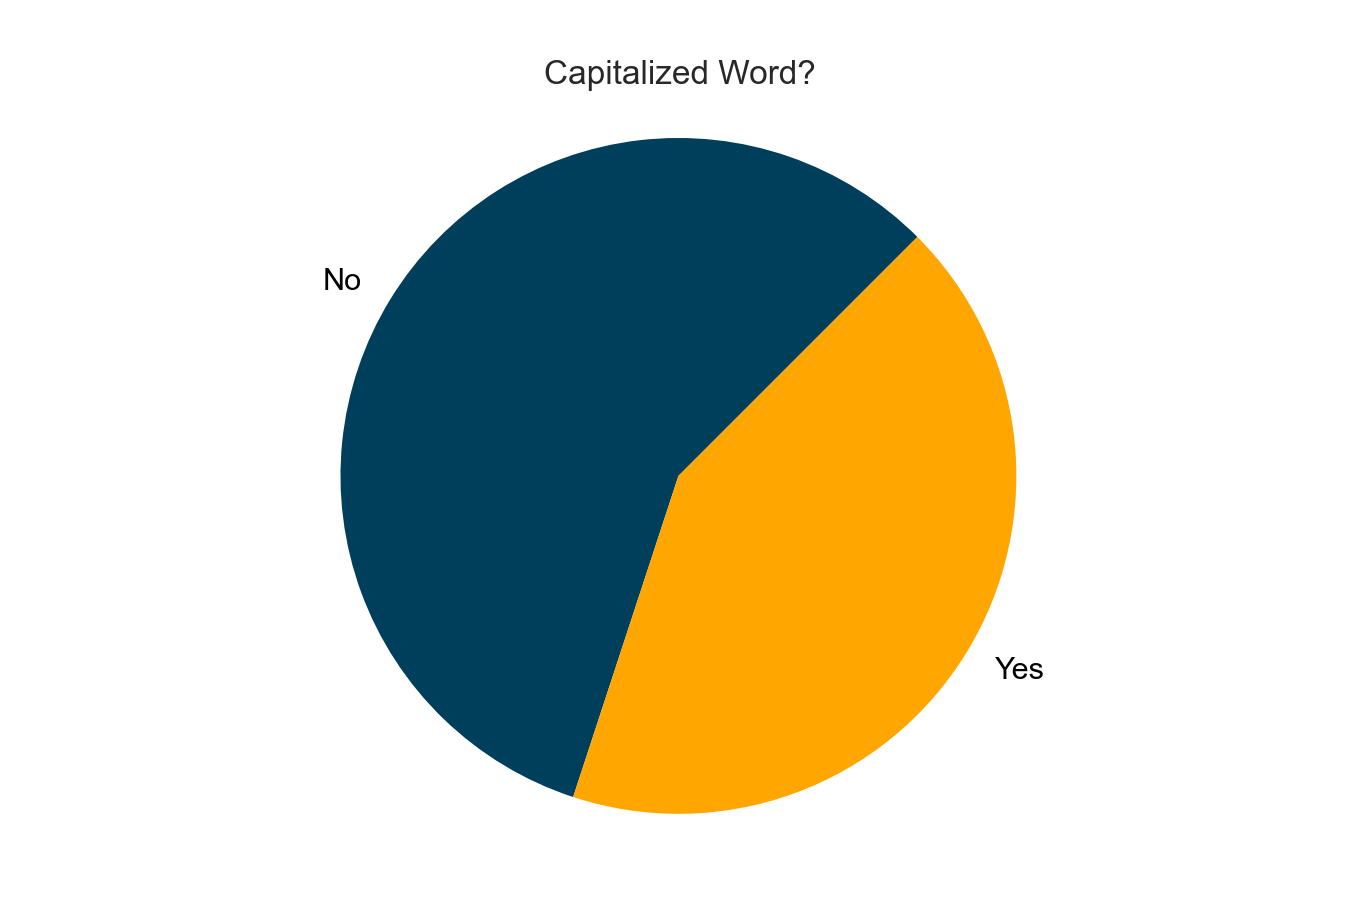

In [40]:
def contains_capitalized_word(s):
    for w in s.split():
        if w.isupper():
            return True
    return False


df["contains_capitalized"] = df["title"].apply(contains_capitalized_word)

value_counts = df["contains_capitalized"].value_counts().to_dict()
fig, ax = plt.subplots()
_ = ax.pie([value_counts[False], value_counts[True]], labels=['No', 'Yes'], 
           colors=[PLOT_COLORS[4], '#ffa600'], textprops={'color': '#040204'}, startangle=45)
_ = ax.axis('equal')
_ = ax.set_title('Capitalized Word?')

In [41]:
import mpld3
html_str = mpld3.fig_to_html(fig)
Html_file= open("index7.html","w")
Html_file.write(html_str)
Html_file.close()

In [42]:
df["contains_capitalized"].value_counts(normalize=True)

False   0.57
True    0.43
Name: contains_capitalized, dtype: float64

We can see that around `40%` of trending video titles contain at least a capitalized word. We will later use this added new column contains_capitalized in analyzing correlation between variables.

# Video Title Lengths

Let's add another column called title_length to our dataset.

In [43]:
df["title_length"] = df["title"].apply(lambda x: len(x))
df.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,contains_capitalized,title_length
0,Iot0eF6EoNA,Sadak 2 | Official Trailer | Sanjay | Pooja | ...,2020-08-12T04:31:41Z,UCGqvJPRcv7aVFun-eTsatcA,FoxStarHindi,24,2020-08-12T00:00:00Z,sadak|sadak 2|mahesh bhatt|vishesh films|pooja...,9885899,224925,3979409,350210,https://i.ytimg.com/vi/Iot0eF6EoNA/default.jpg,False,False,Three Streams. Three Stories. One Journey. Sta...,False,92
1,x-KbnJ9fvJc,Kya Baat Aa : Karan Aujla (Official Video) Tan...,2020-08-11T09:00:11Z,UCm9SZAl03Rev9sFwloCdz1g,Rehaan Records,10,2020-08-12T00:00:00Z,[None],11308046,655450,33242,405146,https://i.ytimg.com/vi/x-KbnJ9fvJc/default.jpg,False,False,Singer/Lyrics: Karan Aujla Feat Tania Music/ D...,False,97
2,KX06ksuS6Xo,Diljit Dosanjh: CLASH (Official) Music Video |...,2020-08-11T07:30:02Z,UCZRdNleCgW-BGUJf-bbjzQg,Diljit Dosanjh,10,2020-08-12T00:00:00Z,clash diljit dosanjh|diljit dosanjh|diljit dos...,9140911,296533,6179,30058,https://i.ytimg.com/vi/KX06ksuS6Xo/default.jpg,False,False,CLASH official music video performed by DILJIT...,True,55
3,UsMRgnTcchY,Dil Ko Maine Di Kasam Video | Amaal M Ft.Ariji...,2020-08-10T05:30:49Z,UCq-Fj5jknLsUf-MWSy4_brA,T-Series,10,2020-08-12T00:00:00Z,hindi songs|2020 hindi songs|2020 new songs|t-...,23564512,743931,84162,136942,https://i.ytimg.com/vi/UsMRgnTcchY/default.jpg,False,False,Gulshan Kumar and T-Series presents Bhushan Ku...,True,98
4,WNSEXJJhKTU,"Baarish (Official Video) Payal Dev,Stebin Ben ...",2020-08-11T05:30:13Z,UCye6Oz0mg46S362LwARGVcA,VYRLOriginals,10,2020-08-12T00:00:00Z,VYRL Original|Mohsin Khan|Shivangi Joshi|Payal...,6783649,268817,8798,22984,https://i.ytimg.com/vi/WNSEXJJhKTU/default.jpg,False,False,VYRL Originals brings to you ‘Baarish’ - the b...,True,100


Let's plot the histogram of title lengths to get an idea about the lengths of trending video titles.

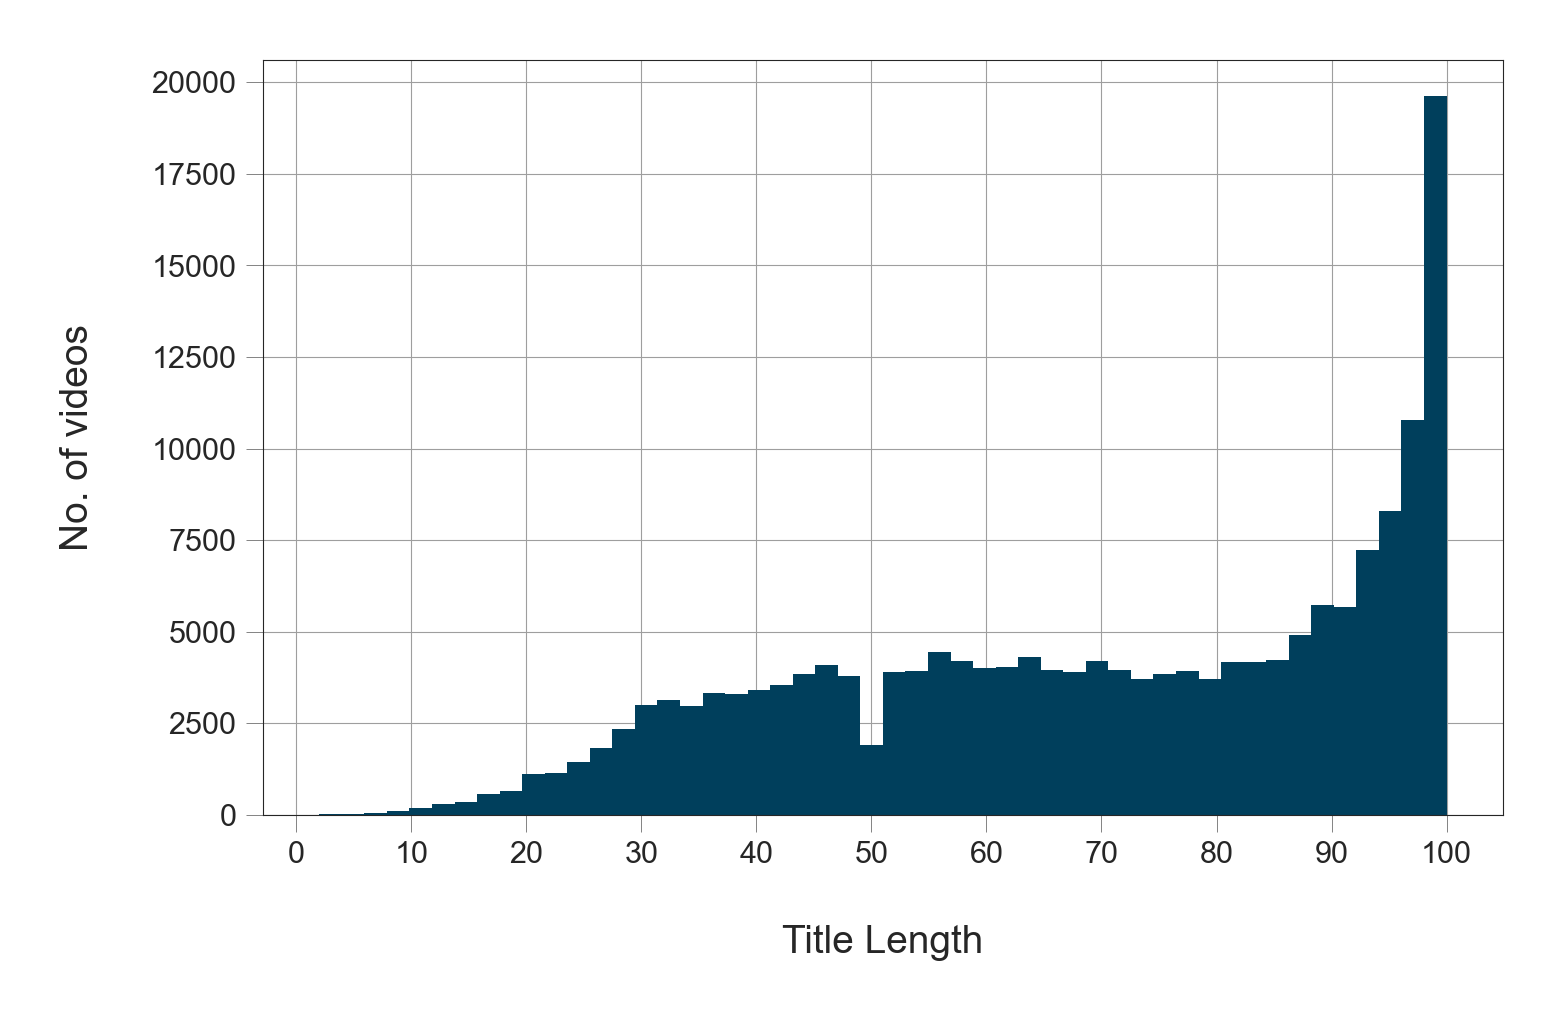

In [44]:
fig, ax = plt.subplots()
_ = sns.distplot(df["title_length"], kde=False, rug=False, 
                 color=PLOT_COLORS[4], hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel="Title Length", ylabel="No. of videos", xticks=range(0, 110, 10))

In [45]:
import mpld3
html_str = mpld3.fig_to_html(fig)
Html_file= open("index8.html","w")
Html_file.write(html_str)
Html_file.close()

We can see that most video title has lengths around 75 to 100.

Let's draw the scatter plot to see the relation between title lengths and number of views.

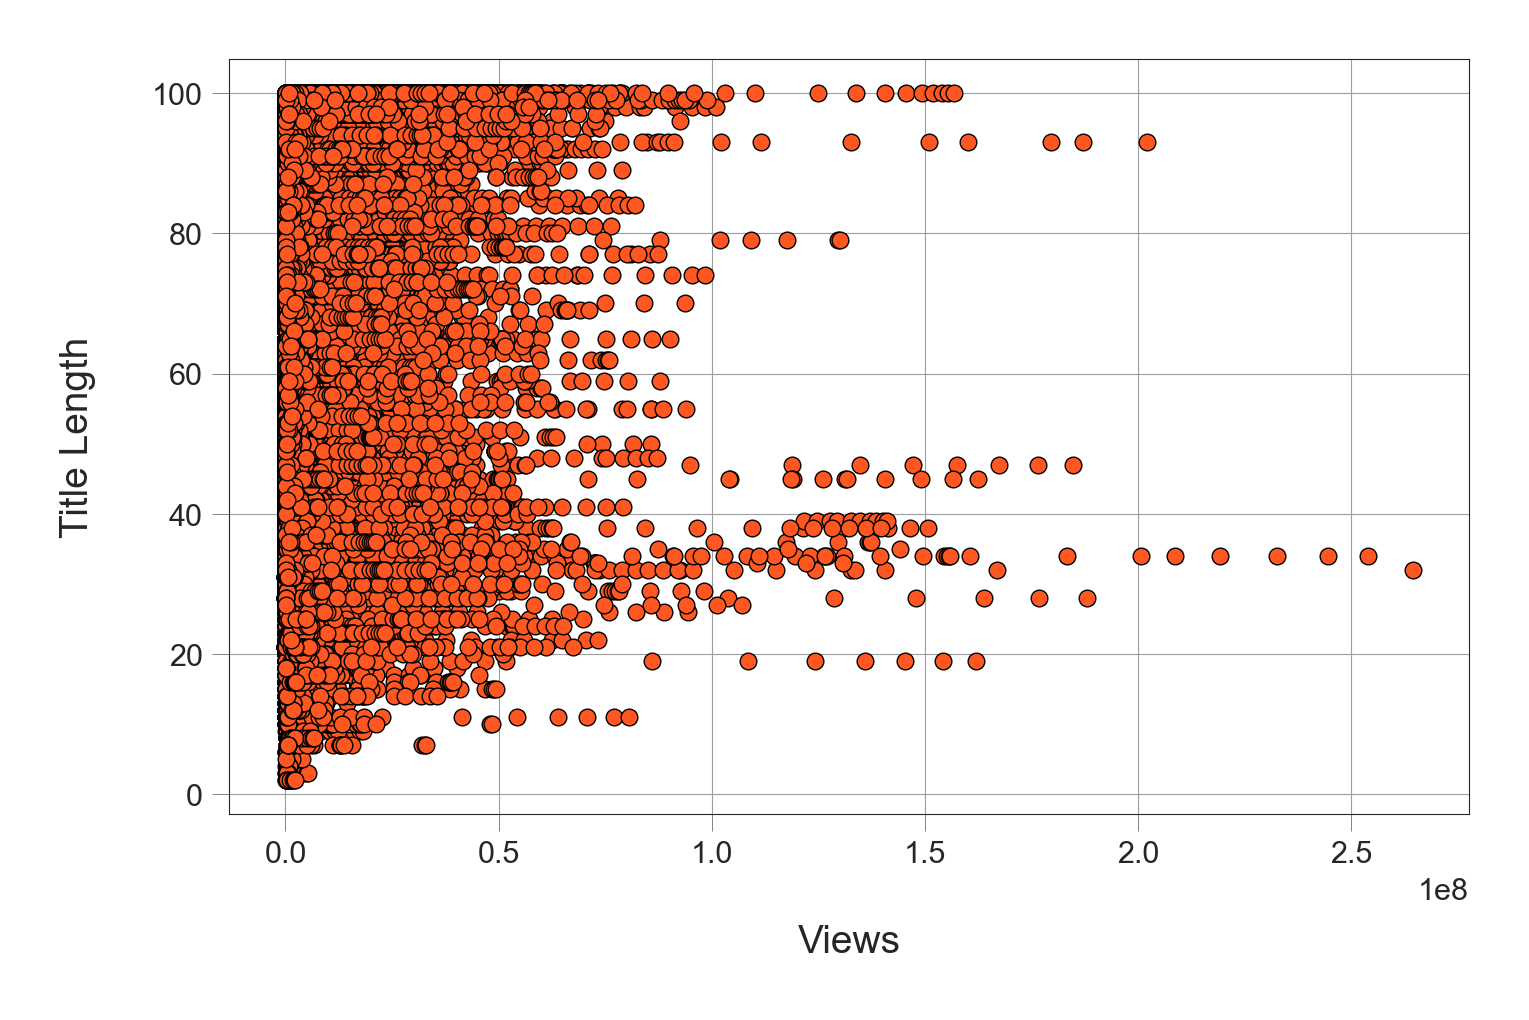

In [46]:
fig, ax = plt.subplots()
_ = ax.scatter(x=df['view_count'], y=df['title_length'], color=PLOT_COLORS[2], edgecolors="#000000", linewidths=0.5)
_ = ax.set(xlabel="Views", ylabel="Title Length")

In [47]:
import mpld3
html_str = mpld3.fig_to_html(fig)
Html_file= open("index9.html","w")
Html_file.write(html_str)
Html_file.close()

By looking at the scatter plot, we can say that there is no relationship between the title length and the number of views. However, we notice an interesting thing: videos that have 40,000,000 views and more have title length between 22 and 65 characters approximately whereas videos having 60,000,000 views and more have title length between 50 and 55 characters approximately.



# Correlation between dataset variables

Now let's see how the dataset variables are correlated with each other: for example, we would like to see how views and likes are correlated, meaning do views and likes increase and decrease together (positive correlation)? Does one of them increase when the other decrease and vice versa (negative correlation)? Or are they not correlated?

Correlation is represented as a value between -1 and +1 where +1 denotes the highest positive correlation, -1 denotes the highest negative correlation, and 0 denotes that there is no correlation.

Let's see the correlation table between our dataset variables (numerical and boolean variables only).

In [48]:
df.corr()

,categoryId,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,contains_capitalized,title_length
categoryId,1.00,-0.13,-0.09,-0.01,-0.10,0.04,0.02,-0.09,-0.20
view_count,-0.13,1.00,0.81,0.12,0.47,0.01,0.02,0.01,-0.00
likes,-0.09,0.81,1.00,0.07,0.62,-0.00,-0.04,0.01,-0.11
dislikes,-0.01,0.12,0.07,1.00,0.15,-0.00,-0.00,-0.00,0.01
comment_count,-0.10,0.47,0.62,0.15,1.00,-0.01,-0.01,0.05,-0.04
comments_disabled,0.04,0.01,-0.00,-0.00,-0.01,1.00,0.04,-0.03,-0.03
ratings_disabled,0.02,0.02,-0.04,-0.00,-0.01,0.04,1.00,-0.02,0.01
contains_capitalized,-0.09,0.01,0.01,-0.00,0.05,-0.03,-0.02,1.00,0.06
title_length,-0.20,-0.00,-0.11,0.01,-0.04,-0.03,0.01,0.06,1.00


We see for example that views and likes are highly positively correlated with a correlation value of `0.85`; we see also a high positive correlation `0.78` between likes and comment count, and between dislikes and comment count `0.71`.

There is some positive correlation between views and dislikes, between views and comment count, between likes and dislikes.

Now let's visualize the correlation table above using a heatmap.

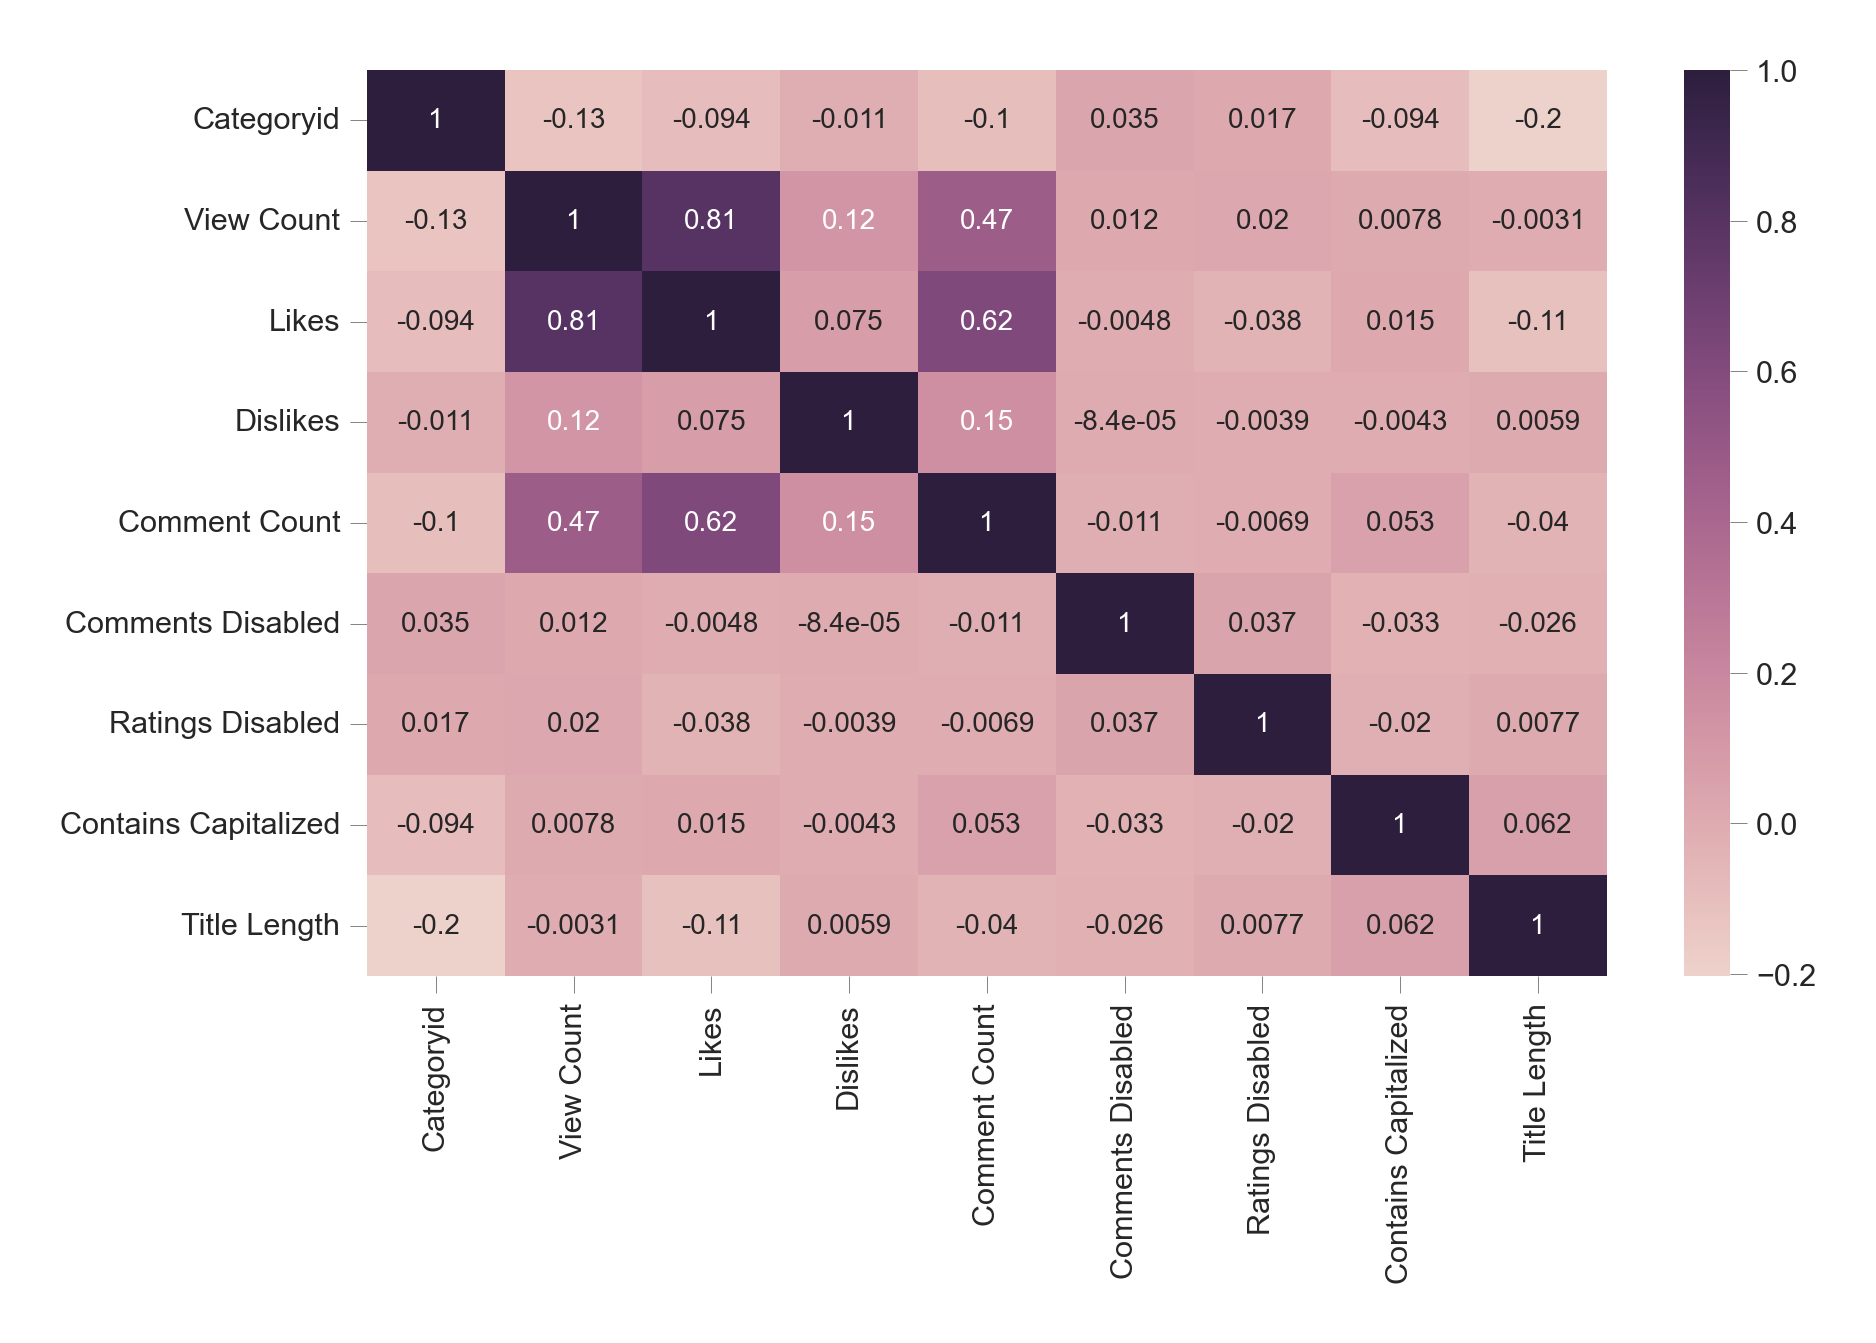

In [49]:
h_labels = [x.replace('_', ' ').title() for x in 
            list(df.select_dtypes(include=['number', 'bool']).columns.values)]

fig, ax = plt.subplots(figsize=(10,6))
_ = sns.heatmap(df.corr(), annot=True, xticklabels=h_labels, yticklabels=h_labels, cmap=sns.cubehelix_palette(as_cmap=True), ax=ax)

In [50]:
import mpld3
html_str = mpld3.fig_to_html(fig)
Html_file= open("index10.html","w")
Html_file.write(html_str)
Html_file.close()

The correlation map and correlation table above say that views and likes are highly positively correlated. 

Let's verify that by plotting a scatter plot between views and likes to visualize the relationship between these variables.

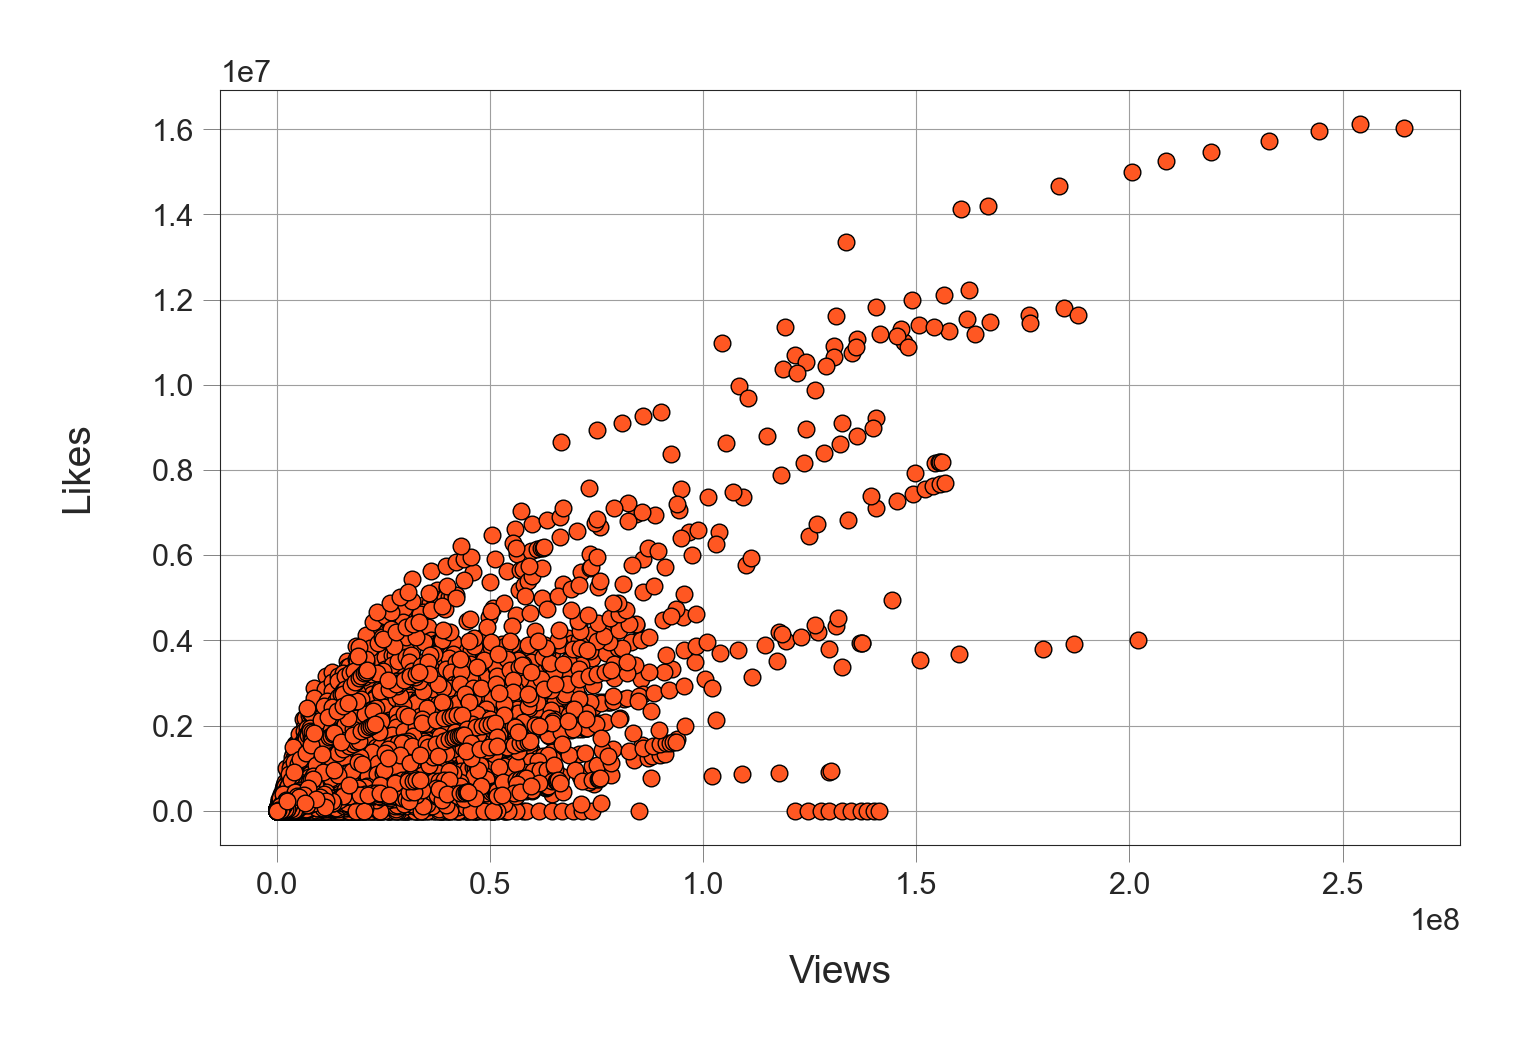

In [51]:
fig, ax = plt.subplots()
_ = plt.scatter(x=df['view_count'], y=df['likes'], color=PLOT_COLORS[2], edgecolors="#000000", linewidths=0.5)
_ = ax.set(xlabel="Views", ylabel="Likes")

In [52]:
import mpld3
html_str = mpld3.fig_to_html(fig)
Html_file= open("index11.html","w")
Html_file.write(html_str)
Html_file.close()

We see that views and likes are truly positively correlated: as one increases, the other increases too — mostly.

# Most Common Words in Video Titles

Let's see if there are some words that are used significantly in trending video titles. We will display the `25` most common words in all trending video titles.

In [53]:
title_words = list(df["title"].apply(lambda x: x.split()))
title_words = [x for y in title_words for x in y]
Counter(title_words).most_common(25)

[('|', 237658),
 ('-', 46814),
 ('||', 28353),
 ('#shorts', 17182),
 ('&', 11314),
 ('2021', 10495),
 ('Episode', 9309),
 ('Song', 9306),
 ('New', 8957),
 ('2', 7555),
 ('2022', 7485),
 ('The', 7432),
 ('in', 7052),
 ('Video', 6916),
 ('Official', 6742),
 ('Punjabi', 6706),
 ('Songs', 6187),
 ('to', 5634),
 ('Promo', 5452),
 ('Latest', 5371),
 ('2020', 5368),
 ('I', 4985),
 ('Ka', 4717),
 ('TV', 4691),
 ('Video)', 4604)]

We see that characters like `|` and `-` have been used a lot in video titles - 41986 and 15777 respectively. Also, words like `Movie`, `Telugu`, `Full`, `Video`, etc. are very common in video titles, each occured in more than 1500 video titles.b

Why not draw a word cloud for the titles of our trending videos? 

Word Cloud is a way to visualize most common words in the titles; the more common the word is, the bigger its font size is.

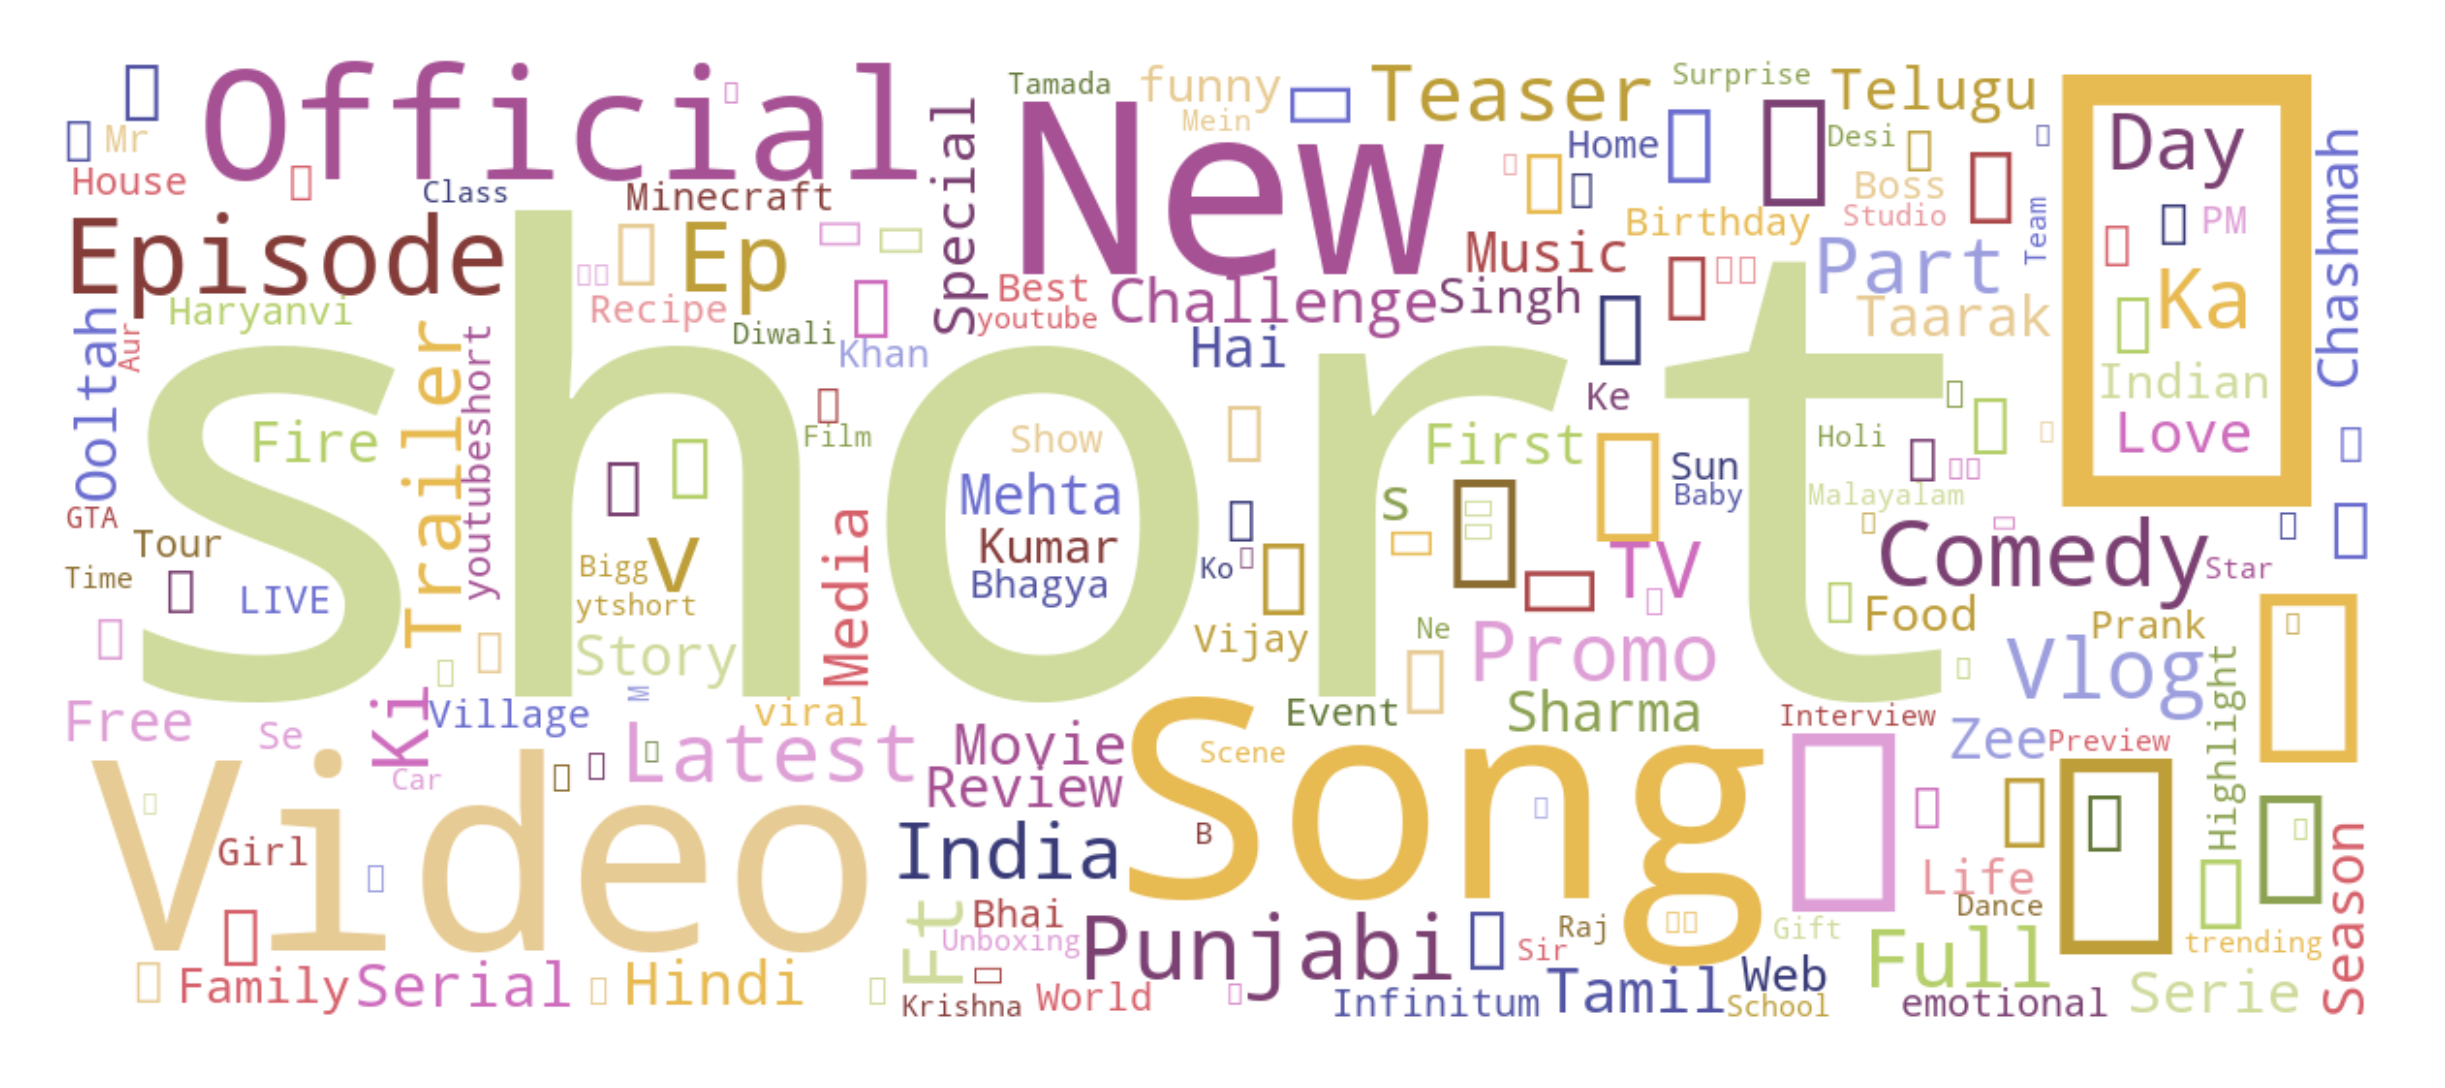

In [54]:
wc = wordcloud.WordCloud(width=1200, height=500, 
                         collocations=False, background_color="white", 
                         colormap="tab20b").generate(" ".join(title_words))
plt.figure(figsize=(15,10))
plt.imshow(wc, interpolation='bilinear')
_ = plt.axis("off")

In [55]:
import mpld3
html_str = mpld3.fig_to_html(fig)
Html_file= open("index12.html","w")
Html_file.write(html_str)
Html_file.close()

# Which channels have the largest number of trending videos?

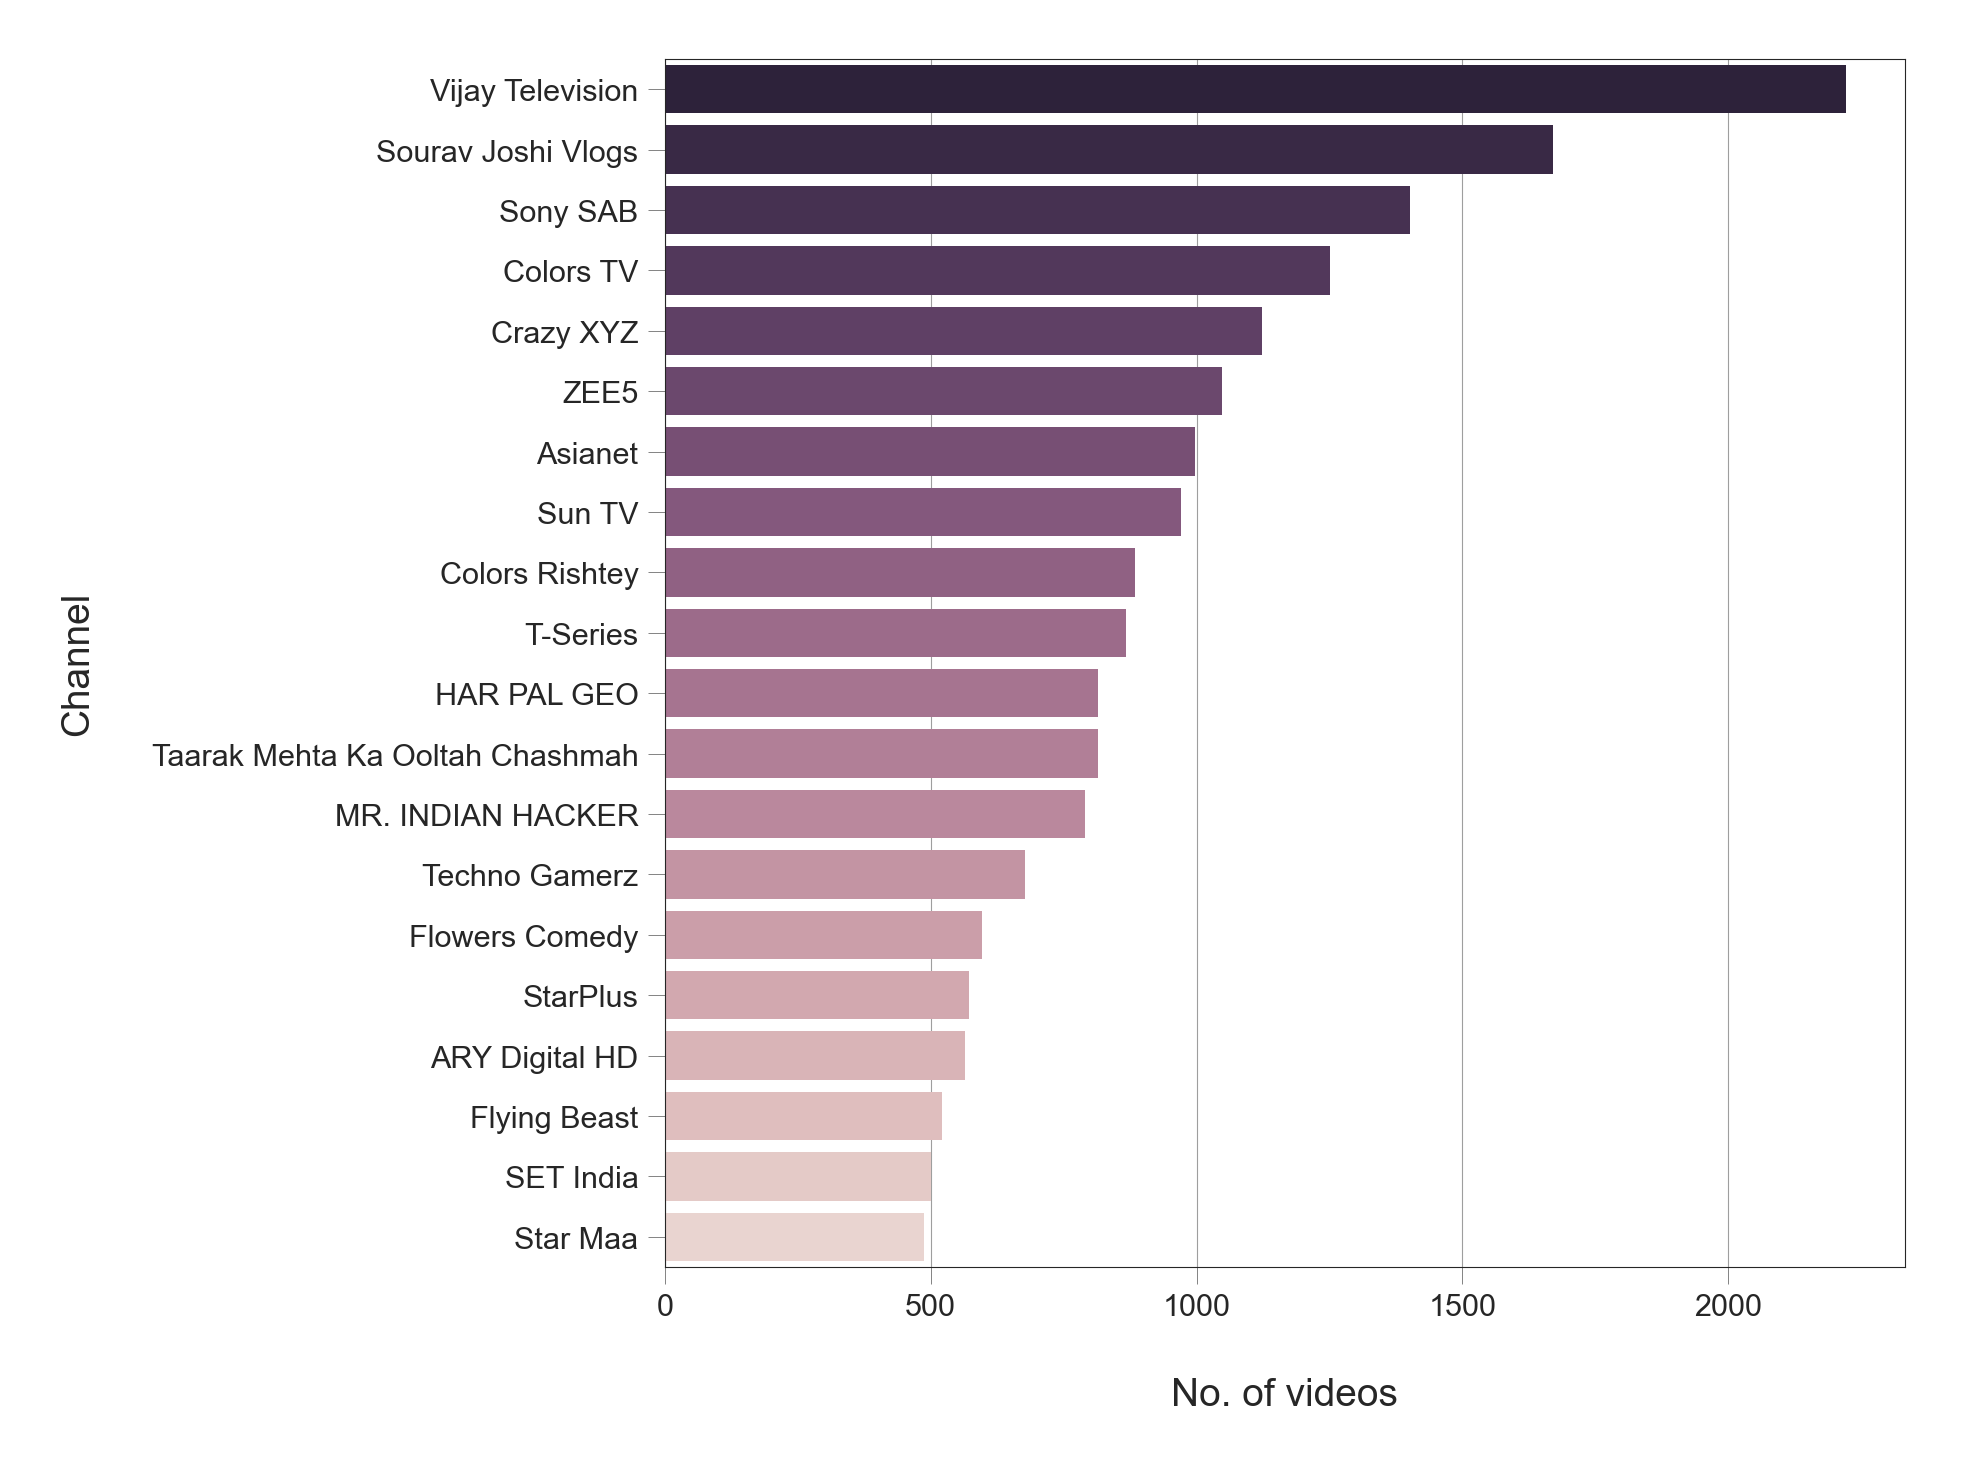

In [56]:
cdf = df.groupby("channelTitle").size().reset_index(name="video_count") \
    .sort_values("video_count", ascending=False).head(20)

fig, ax = plt.subplots(figsize=(8,8))
_ = sns.barplot(x="video_count", y="channelTitle", data=cdf,
                palette=sns.cubehelix_palette(n_colors=20, reverse=True), ax=ax)
_ = ax.set(xlabel="No. of videos", ylabel="Channel")

In [57]:
import mpld3
html_str = mpld3.fig_to_html(fig)
Html_file= open("index13.html","w")
Html_file.write(html_str)
Html_file.close()

# Which video category has the largest number of trending videos?

First, we will add a column that contains category names based on the values in category_id column. We will use a category JSON file provided with the dataset which contains information about each category.

In [59]:
with open("./dataset/IN_category_id.json") as file:
    categories = json.load(file)["items"]
cat_dict = {}
for cat in categories:
    cat_dict[int(cat["id"])] = cat["snippet"]["title"]
df['category_name'] = df['categoryId'].map(cat_dict)

In [60]:
df.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,contains_capitalized,title_length,category_name
0,Iot0eF6EoNA,Sadak 2 | Official Trailer | Sanjay | Pooja | ...,2020-08-12T04:31:41Z,UCGqvJPRcv7aVFun-eTsatcA,FoxStarHindi,24,2020-08-12T00:00:00Z,sadak|sadak 2|mahesh bhatt|vishesh films|pooja...,9885899,224925,3979409,350210,https://i.ytimg.com/vi/Iot0eF6EoNA/default.jpg,False,False,Three Streams. Three Stories. One Journey. Sta...,False,92,Entertainment
1,x-KbnJ9fvJc,Kya Baat Aa : Karan Aujla (Official Video) Tan...,2020-08-11T09:00:11Z,UCm9SZAl03Rev9sFwloCdz1g,Rehaan Records,10,2020-08-12T00:00:00Z,[None],11308046,655450,33242,405146,https://i.ytimg.com/vi/x-KbnJ9fvJc/default.jpg,False,False,Singer/Lyrics: Karan Aujla Feat Tania Music/ D...,False,97,Music
2,KX06ksuS6Xo,Diljit Dosanjh: CLASH (Official) Music Video |...,2020-08-11T07:30:02Z,UCZRdNleCgW-BGUJf-bbjzQg,Diljit Dosanjh,10,2020-08-12T00:00:00Z,clash diljit dosanjh|diljit dosanjh|diljit dos...,9140911,296533,6179,30058,https://i.ytimg.com/vi/KX06ksuS6Xo/default.jpg,False,False,CLASH official music video performed by DILJIT...,True,55,Music
3,UsMRgnTcchY,Dil Ko Maine Di Kasam Video | Amaal M Ft.Ariji...,2020-08-10T05:30:49Z,UCq-Fj5jknLsUf-MWSy4_brA,T-Series,10,2020-08-12T00:00:00Z,hindi songs|2020 hindi songs|2020 new songs|t-...,23564512,743931,84162,136942,https://i.ytimg.com/vi/UsMRgnTcchY/default.jpg,False,False,Gulshan Kumar and T-Series presents Bhushan Ku...,True,98,Music
4,WNSEXJJhKTU,"Baarish (Official Video) Payal Dev,Stebin Ben ...",2020-08-11T05:30:13Z,UCye6Oz0mg46S362LwARGVcA,VYRLOriginals,10,2020-08-12T00:00:00Z,VYRL Original|Mohsin Khan|Shivangi Joshi|Payal...,6783649,268817,8798,22984,https://i.ytimg.com/vi/WNSEXJJhKTU/default.jpg,False,False,VYRL Originals brings to you ‘Baarish’ - the b...,True,100,Music


Now that we have added catergory_name to each video, we can see which category had the largest number of trending videos.

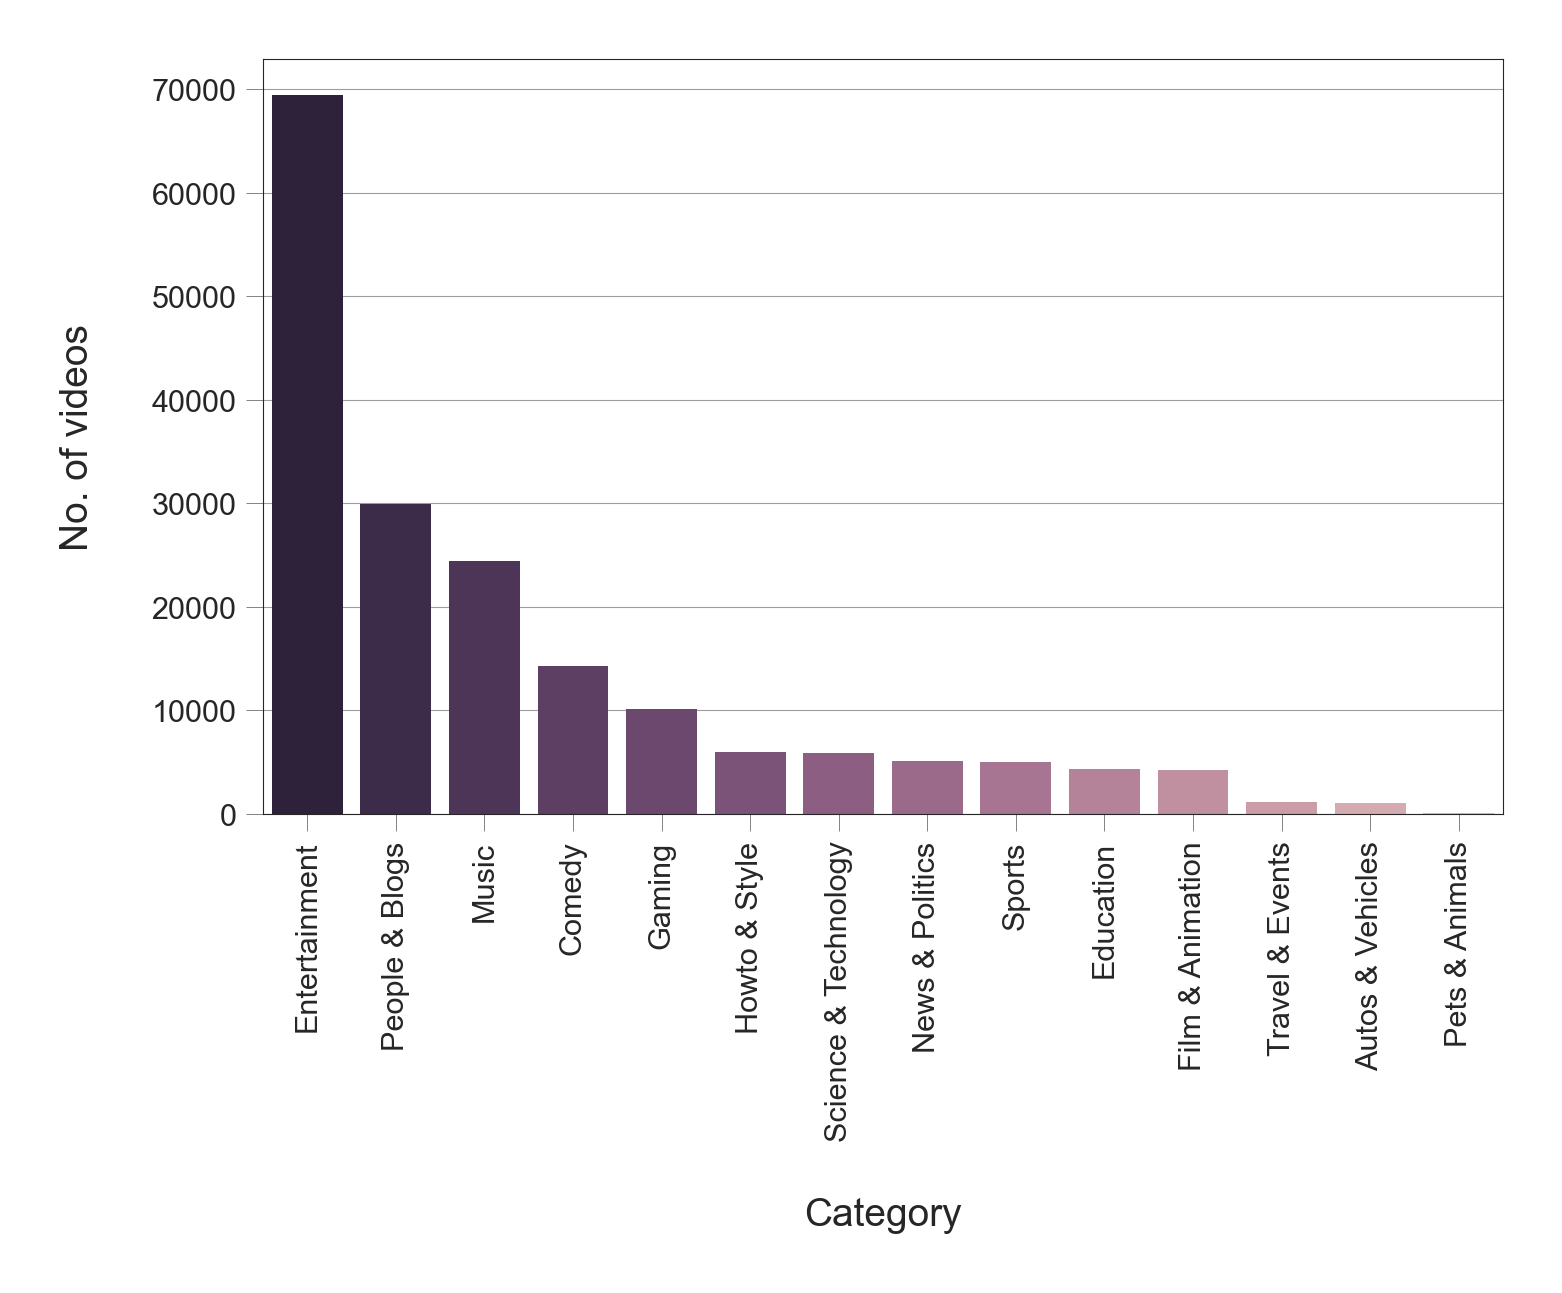

In [61]:
cdf = df["category_name"].value_counts().to_frame().reset_index()
cdf.rename(columns={"index": "category_name", "category_name": "No_of_videos"}, inplace=True)
fig, ax = plt.subplots()
_ = sns.barplot(x="category_name", y="No_of_videos", data=cdf, 
                palette=sns.cubehelix_palette(n_colors=16, reverse=True), ax=ax)
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
_ = ax.set(xlabel="Category", ylabel="No. of videos")

In [62]:
import mpld3
html_str = mpld3.fig_to_html(fig)
Html_file= open("index14.html","w")
Html_file.write(html_str)
Html_file.close()

In [63]:
len(df[(df["category_name"] == 'Entertainment')].index)

69447

In [64]:
len(df[(df["category_name"] == 'News & Politics')].index)

5167

In [65]:
len(df[(df["category_name"] == 'Music')].index)

24466

In [67]:
len(df[(df["category_name"] == 'Movies')].index)

0

In [68]:
len(df[(df["category_name"] == 'Travel & Events')].index)

1198

In [69]:
len(df[(df["category_name"] == 'Pets & Animals')].index)

92

We see that the Entertainment category contains the largest number of trending videos among other categories: `16,712` videos, followed by News & Politics category with `5,241` videos, followed by Music category with around `3,858` videos, and so on.

The video categories having smallest number of trending videos is Pets & Animals(`3` videos), followed by Travel & Events category and Movies category with `8` and `16` videos respectively.

In [70]:
df.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,contains_capitalized,title_length,category_name
0,Iot0eF6EoNA,Sadak 2 | Official Trailer | Sanjay | Pooja | ...,2020-08-12T04:31:41Z,UCGqvJPRcv7aVFun-eTsatcA,FoxStarHindi,24,2020-08-12T00:00:00Z,sadak|sadak 2|mahesh bhatt|vishesh films|pooja...,9885899,224925,3979409,350210,https://i.ytimg.com/vi/Iot0eF6EoNA/default.jpg,False,False,Three Streams. Three Stories. One Journey. Sta...,False,92,Entertainment
1,x-KbnJ9fvJc,Kya Baat Aa : Karan Aujla (Official Video) Tan...,2020-08-11T09:00:11Z,UCm9SZAl03Rev9sFwloCdz1g,Rehaan Records,10,2020-08-12T00:00:00Z,[None],11308046,655450,33242,405146,https://i.ytimg.com/vi/x-KbnJ9fvJc/default.jpg,False,False,Singer/Lyrics: Karan Aujla Feat Tania Music/ D...,False,97,Music
2,KX06ksuS6Xo,Diljit Dosanjh: CLASH (Official) Music Video |...,2020-08-11T07:30:02Z,UCZRdNleCgW-BGUJf-bbjzQg,Diljit Dosanjh,10,2020-08-12T00:00:00Z,clash diljit dosanjh|diljit dosanjh|diljit dos...,9140911,296533,6179,30058,https://i.ytimg.com/vi/KX06ksuS6Xo/default.jpg,False,False,CLASH official music video performed by DILJIT...,True,55,Music
3,UsMRgnTcchY,Dil Ko Maine Di Kasam Video | Amaal M Ft.Ariji...,2020-08-10T05:30:49Z,UCq-Fj5jknLsUf-MWSy4_brA,T-Series,10,2020-08-12T00:00:00Z,hindi songs|2020 hindi songs|2020 new songs|t-...,23564512,743931,84162,136942,https://i.ytimg.com/vi/UsMRgnTcchY/default.jpg,False,False,Gulshan Kumar and T-Series presents Bhushan Ku...,True,98,Music
4,WNSEXJJhKTU,"Baarish (Official Video) Payal Dev,Stebin Ben ...",2020-08-11T05:30:13Z,UCye6Oz0mg46S362LwARGVcA,VYRLOriginals,10,2020-08-12T00:00:00Z,VYRL Original|Mohsin Khan|Shivangi Joshi|Payal...,6783649,268817,8798,22984,https://i.ytimg.com/vi/WNSEXJJhKTU/default.jpg,False,False,VYRL Originals brings to you ‘Baarish’ - the b...,True,100,Music


Now we can see which days of the week had the largest numbers of trending videos.

ValueError: Could not interpret input 'No_of_videos'

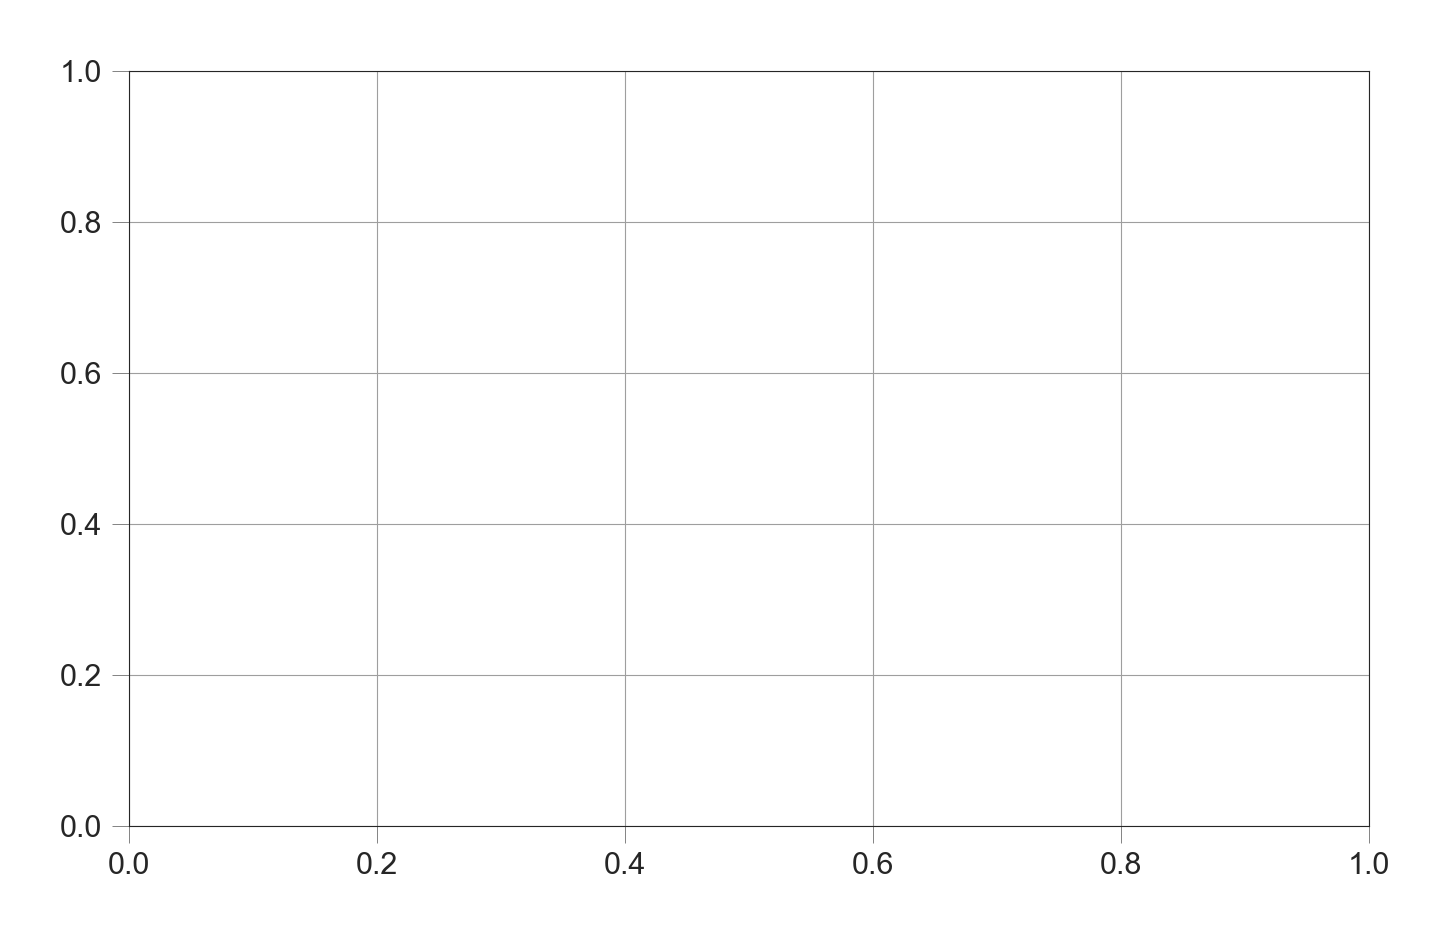

In [73]:
cdf = df["publishedAt"].value_counts()\
        .to_frame().reset_index().rename(columns={"index": "publishedAt", "publishing_day": "No_of_videos"})
fig, ax = plt.subplots()
_ = sns.barplot(x="publishedAt", y="No_of_videos", data=cdf, 
                palette=sns.color_palette(['#003f5c', '#374c80', '#7a5195', 
                                           '#bc5090', '#ef5675', '#ff764a', '#ffa600'], n_colors=7), ax=ax)
_ = ax.set(xlabel="Publishing Day", ylabel="No. of videos")

We can see that the number of trending videos published on Sundayis noticeably less than the number of trending videos published on other days of the week.

Now let's use publishing_hour column to see which publishing hours had the largest number of trending videos.

# How many trending videos have their comments disabled?

To know this, we can use `comments_disabled` column.

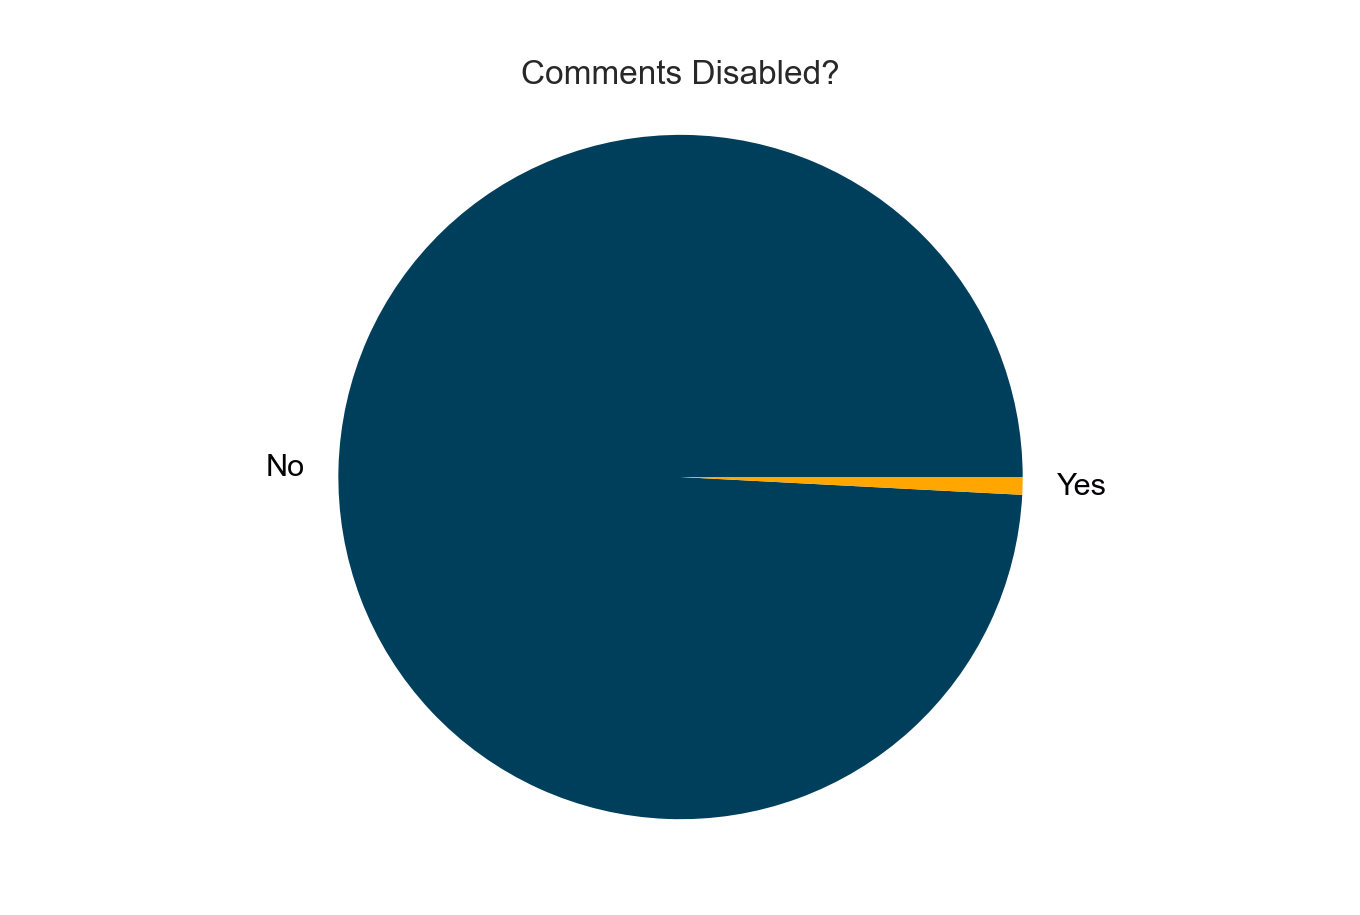

In [74]:
value_counts = df["comments_disabled"].value_counts().to_dict()
fig, ax = plt.subplots()
_ = ax.pie(x=[value_counts[False], value_counts[True]], labels=['No', 'Yes'], 
           colors=['#003f5c', '#ffa600'], textprops={'color': '#040204'})
_ = ax.axis('equal')
_ = ax.set_title('Comments Disabled?')

In [75]:
import mpld3
html_str = mpld3.fig_to_html(fig)
Html_file= open("index15.html","w")
Html_file.write(html_str)
Html_file.close()

In [76]:
df["comments_disabled"].value_counts(normalize=True)

False   0.99
True    0.01
Name: comments_disabled, dtype: float64

We see that only `3%` of trending videos prevented users from commenting.

# How many trending videos have their ratings disabled?

To know this, we use `ratings_disabled` column.

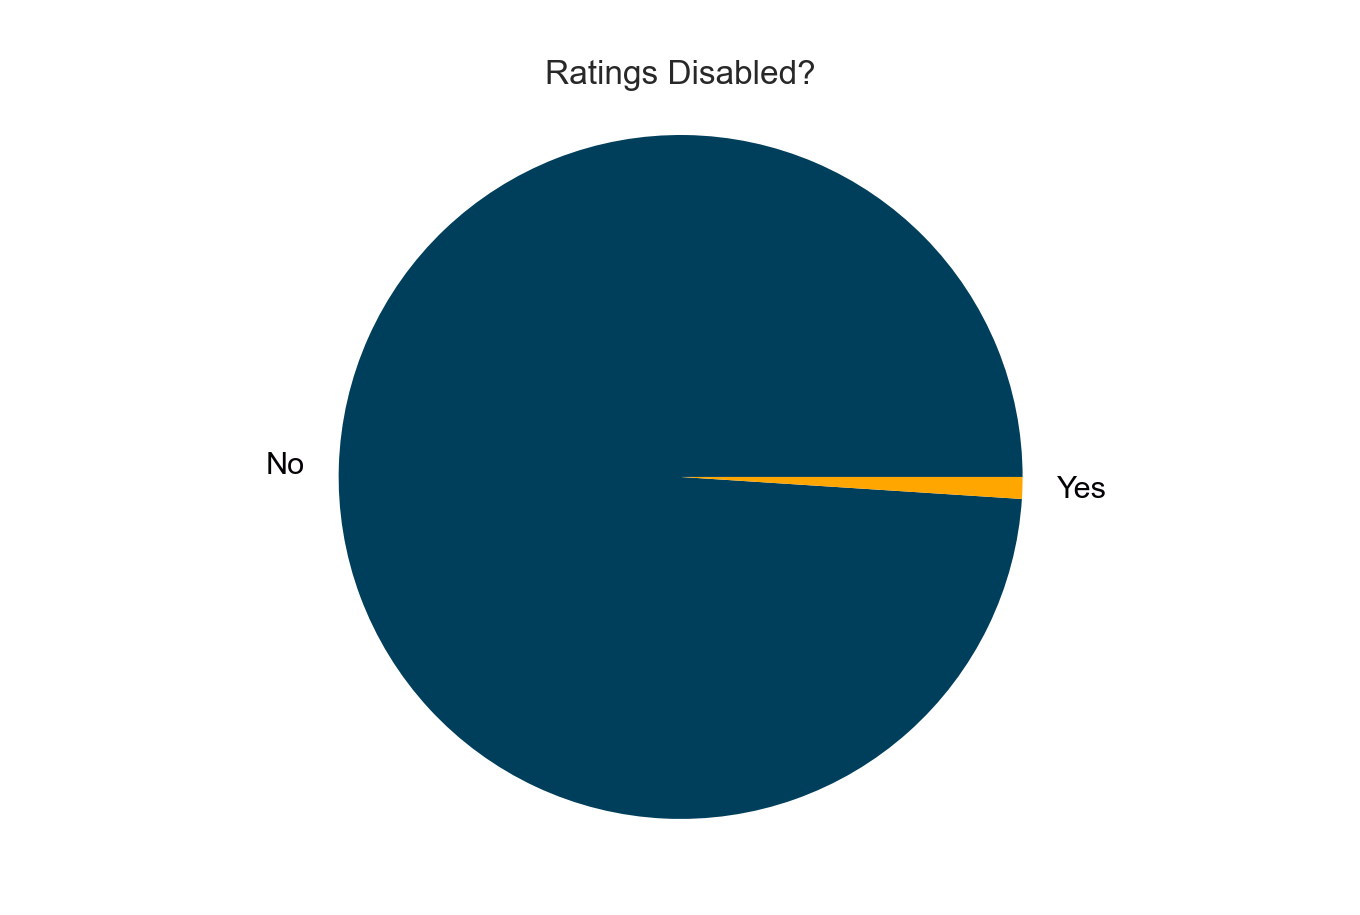

In [77]:
value_counts = df["ratings_disabled"].value_counts().to_dict()
fig, ax = plt.subplots()
_ = ax.pie([value_counts[False], value_counts[True]], labels=['No', 'Yes'], 
            colors=['#003f5c', '#ffa600'], textprops={'color': '#040204'})
_ = ax.axis('equal')
_ = ax.set_title('Ratings Disabled?')

In [78]:
import mpld3
html_str = mpld3.fig_to_html(fig)
Html_file= open("index16.html","w")
Html_file.write(html_str)
Html_file.close()

In [79]:
df["ratings_disabled"].value_counts()

False    179427
True       1859
Name: ratings_disabled, dtype: int64

We see that only `781` trending videos out of `37352` have disabled ratings on their videos.

# How many videos have both comments and ratings disabled?

In [80]:
len(df[(df["comments_disabled"] == True) & (df["ratings_disabled"] == True)].index)

77

So there are just `360` trending videos that have both comments and ratings disabled.

# Conclusions

### Here are the some of the results we extracted from the analysis: 

* We analyzed a dataset that contains information about YouTube trending videos for 205 days. The dataset was collected in 2017 and 2018 and contains `37352` video entries.


* `86%` of trending videos have less than 1.5 million views, and `95%` have less than 5 million views.


* `87%` of trending videos have less than 40,000 likes, and `94%` have less than 100,000 likes.


* `88`% of trending videos have less than 3,500 comments, and `97`% have less than 25,000 comments.


* Some videos may appear on the trending videos list on more than one day. Our dataset contains `37352` entries but not for 37352 unique videos but for `16307 `unique videos.


* Trending videos that have `60,000,000` views and more have title length between `50` and `55` characters approximately.


* The delimiters `|` and `-` were common in trending video titles.


* The words `Official`, `Video`, `Trailer`, `Episode`, `Song` and `2018` were common also in trending video titles.


* There is a strong positive correlation between the number of views and the number of likes of trending videos: As one of them increases, the other increases, and vice versa.


* There is a strong positive correlation also between the number of likes and the number of comments, and a slightly weaker one between the number of dislikes and the number of comments.


* The category that has the largest number of trending videos is 'Entertainment' with `16,712` videos, followed by 'News & Politics' category with `5241` videos, followed by 'Music' category with `3858` videos.


* On the opposite side, the category that has the smallest number of trending videos is 'Pets & Animals' with `3` videos, followed by 'Travel & Events' with `8` videos, followed by 'Movies' with `16` videos.

If you liked the analysis, please consider to **star** this [repository](https://github.com/ashutoshkrris/YouTube-Trending-Videos-Analysis.git).

Follow me on [LinkedIn](https://www.linkedin.com/in/ashutoshkrris), or visit my [website](http://ashutoshkrris.herokuapp.com).